# Importing Dataset

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
import shutil

# Step 2: Set the file path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/MVC.csv'  # Replace with your actual file path

# Step 3: Import pandas and load the CSV file into a DataFrame
import pandas as pd
df = pd.read_csv(file_path)

# Step 4: Display the first few rows of the dataset
print(df.head())

<ipython-input-95-32f2b6e0ac94>:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


   CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1             

## Data Exploration

In [ ]:
df.head(10)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
5,04/14/2021,12:47,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407458,Dump,Sedan,NaN,NaN,NaN
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
9,12/14/2021,14:58,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [ ]:
df.shape

(2122060, 29)

- There are 2.2M rows and 29 columns within the dataset.

In [ ]:
df.isnull().sum()

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,659941
ZIP CODE,660201
LATITUDE,249239
LONGITUDE,249239
LOCATION,249239
ON STREET NAME,454060
CROSS STREET NAME,808184
OFF STREET NAME,1760373


- There is number of missing values within the dataset.

In [ ]:
# List of contributing factor vehicle columns, now including VEHICLE 5
contributing_factor_columns = [
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5'  # Added this line
]


In [ ]:
# Fill NaN values with "UNKNOWN"
for column in contributing_factor_columns:
    df[column] = df[column].fillna('UNKNOWN')


- In Contributing factor Vehicle 1, 2, 3, 4 and 5 i replaced all the missing values with "unknown" which indicates that for certain vehicle crashes/accidents that happened in NYC were not documented.

In [ ]:
# List of vehicle type code columns
vehicle_type_columns = [
    'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5'
]

# Fill NaN values with "UNKNOWN"
df[vehicle_type_columns] = df[vehicle_type_columns].fillna('UNKNOWN')


-  In the Vehicle Type Code 1, 2, 3, 4 and 5 i filled all the missing values withing the dataset with "Unknown" this shows that certain accidents were undocumented and the reason may be unkown in reports ( medical, police, etc)

In [ ]:
df= df.drop(['LOCATION'], axis=1)


- I dropped Location, because it had over 249239 missing values, which would not provide any relevant keep observations to my dataset

In [ ]:
df = df.drop(['ZIP CODE'], axis=1)

- Zip code had fewer missing values, but would not bring any relevant analysis, rather the boroughs within NYC would bring better insights.

In [ ]:
# Drop the specified columns
df = df.drop(columns=['ON STREET NAME', 'OFF STREET NAME', 'CROSS STREET NAME'])


- All of these street names had wide number of missing values, although on street name would have given relevant analysis on what highways, roads, intersections have the mos accidents. Many of the street names were not inputed correctly into the dataframe, resulting in missclasfication.

In [ ]:
df['NUMBER OF PERSONS INJURED'] = df['NUMBER OF PERSONS INJURED'].fillna(0).astype(int)


In [ ]:
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].fillna(0).astype(int)

- Although there were missing values within these features, instead all the Nan/missing values were filled with 0, in order to perform observations

In [ ]:
# Replace NaN values in the 'BOROUGH' column with "Unspecified"
df['BOROUGH'] = df['BOROUGH'].fillna('Unspecified')


- In the Borough, there were missing values, to understand what main areas accidents happen, I filled them with unspecified which indicated that during or after the accident the report which normally given to insurnace and police statements was not recorded.

In [ ]:
# Drop the 'LATITUDE' and 'LONGITUDE' columns
df = df.drop(columns=['LATITUDE', 'LONGITUDE'])


- Had over 200 thousand missing values, which would not provide neccessary insights

In [ ]:
df.isnull().sum()

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,0
NUMBER OF PERSONS INJURED,0
NUMBER OF PERSONS KILLED,0
NUMBER OF PEDESTRIANS INJURED,0
NUMBER OF PEDESTRIANS KILLED,0
NUMBER OF CYCLIST INJURED,0
NUMBER OF CYCLIST KILLED,0
NUMBER OF MOTORIST INJURED,0


In [ ]:
df.dtypes

,0
CRASH DATE,object
CRASH TIME,object
BOROUGH,object
NUMBER OF PERSONS INJURED,int64
NUMBER OF PERSONS KILLED,int64
NUMBER OF PEDESTRIANS INJURED,int64
NUMBER OF PEDESTRIANS KILLED,int64
NUMBER OF CYCLIST INJURED,int64
NUMBER OF CYCLIST KILLED,int64
NUMBER OF MOTORIST INJURED,int64


In [ ]:
categorical_columns = [
    'BOROUGH','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5'
]
df[categorical_columns] = df[categorical_columns].astype('category')


In [ ]:
# Convert 'CRASH DATE' column to datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y', errors='coerce')

In [ ]:
# Convert 'CRASH TIME' column to datetime format
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M:%S', errors='coerce')


- Converted CRASH DATE and CRASH TIME TO datetime

In [ ]:
# Extract the month and create a new column 'month'
df['Month'] = df['CRASH DATE'].dt.month

# Extract the year and create a new column 'year'
df['Year'] = df['CRASH DATE'].dt.year

- Extracted the Month and the Year from Crash Date to better understand when certain accidents occurred.

In [ ]:
#Extract the day of the week and create a new column 'day_of_week'
df['day_of_week'] = df['CRASH DATE'].dt.day_name()

#Create a mapping for days of the week
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Map the days of the week to numerical values
df['day_of_week'] = df['day_of_week'].map(day_mapping)

- I extracted the day of the week from Crash Date, to understand which day of the week do accidents happen.

In [ ]:
df.dtypes

,0
CRASH DATE,datetime64[ns]
CRASH TIME,datetime64[ns]
BOROUGH,category
NUMBER OF PERSONS INJURED,int64
NUMBER OF PERSONS KILLED,int64
NUMBER OF PEDESTRIANS INJURED,int64
NUMBER OF PEDESTRIANS KILLED,int64
NUMBER OF CYCLIST INJURED,int64
NUMBER OF CYCLIST KILLED,int64
NUMBER OF MOTORIST INJURED,int64


# Univariate Analysis

In [ ]:
df.describe()

,CRASH DATE,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,Month,Year,day_of_week
count,2122060,0,2.122060e+06,2.122060e+06,2.122060e+06,2.122060e+06,2.122060e+06,2.122060e+06,2.122060e+06,2.122060e+06,2.122060e+06,2.122060e+06,2.122060e+06,2.122060e+06
mean,2017-09-12 13:21:32.332922624,NaT,3.162578e-01,1.528232e-03,5.730658e-02,7.544556e-04,2.761468e-02,1.192238e-04,2.272999e-01,6.309906e-04,3.194253e+06,6.673075e+00,2.017187e+03,3.921553e+00
min,2012-07-01 00:00:00,NaT,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,1.000000e+00,2.012000e+03,1.000000e+00
25%,2015-02-08 00:00:00,NaT,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.166635e+06,4.000000e+00,2.015000e+03,2.000000e+00
50%,2017-06-17 00:00:00,NaT,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.697288e+06,7.000000e+00,2.017000e+03,4.000000e+00
75%,2019-10-21 00:00:00,NaT,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.228038e+06,1.000000e+01,2.019000e+03,6.000000e+00
max,2024-09-23 00:00:00,NaT,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.758830e+06,1.200000e+01,2.024000e+03,7.000000e+00
std,NaN,NaN,7.057453e-01,4.127985e-02,2.455615e-01,2.803446e-02,1.659550e-01,1.096139e-02,6.670066e-01,2.747727e-02,1.506339e+06,3.396975e+00,3.207747e+00,1.948564e+00


## Boxplots

<Axes: >

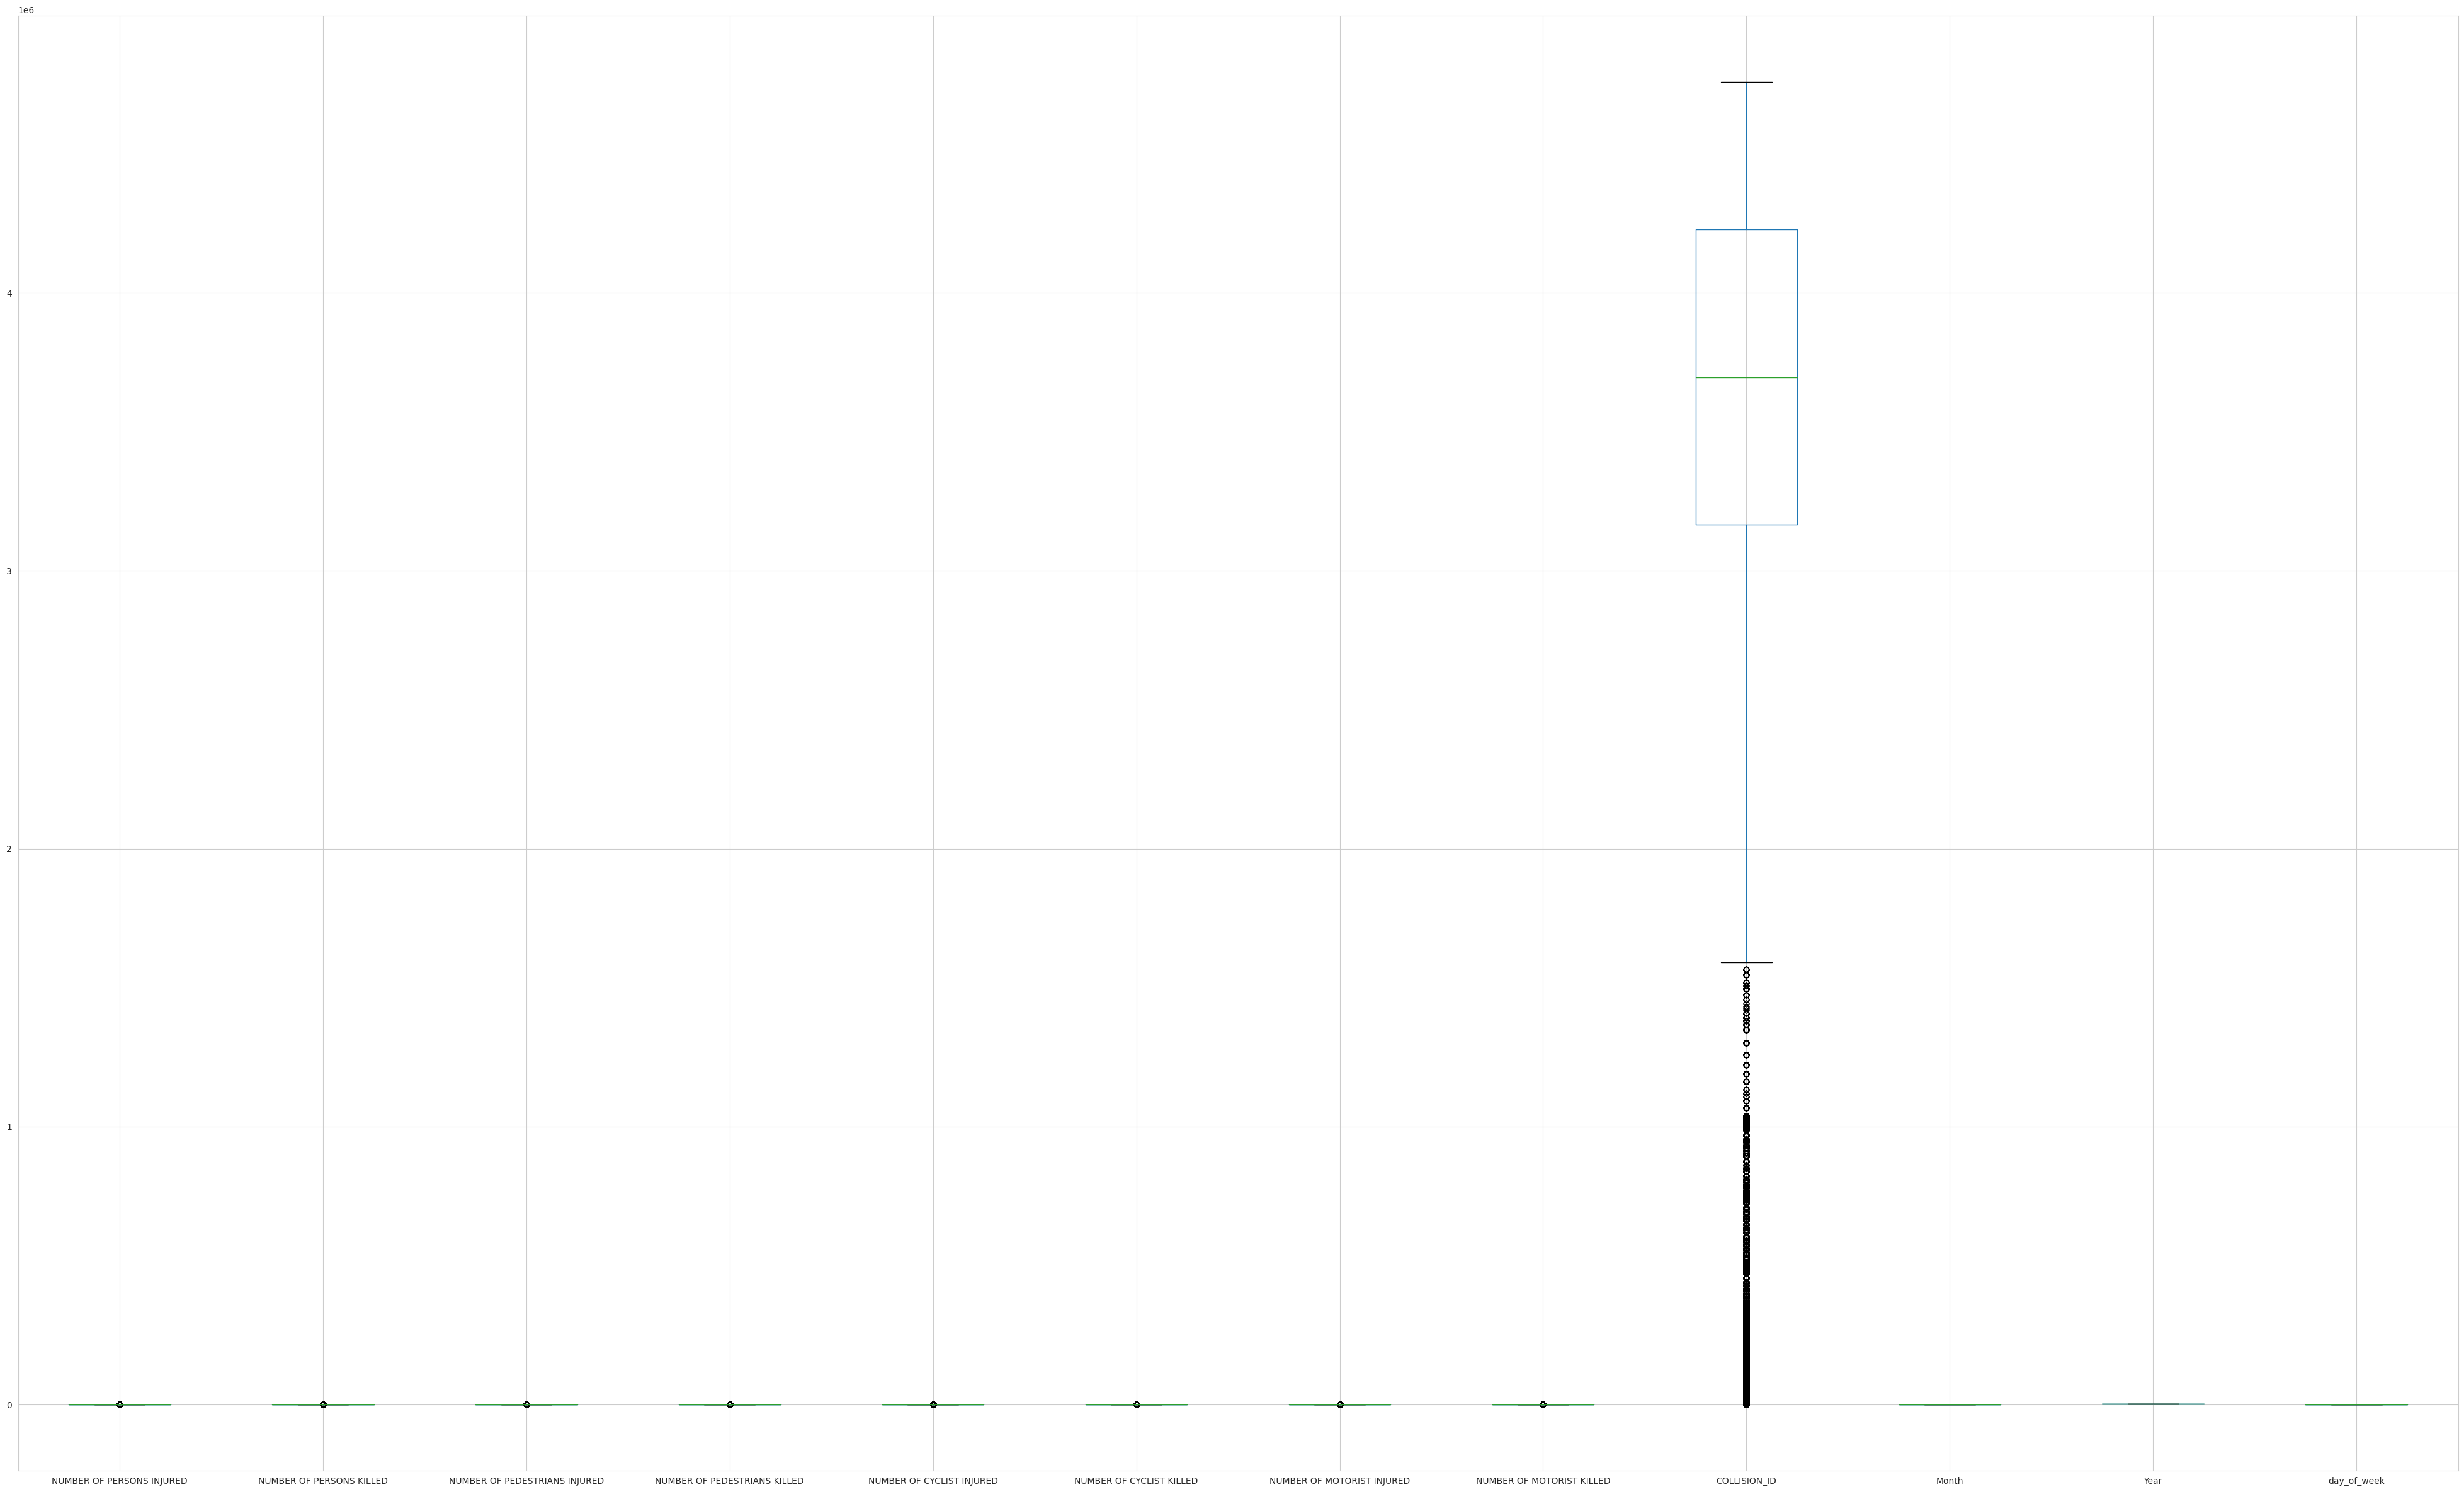

In [ ]:
df.boxplot(figsize=(50,30))

- In New York City, crashes can vary widely depending on location (borough), time of day (weekday vs. weekend), and the parties involved (pedestrians, cyclists, motorists). The boxplot appears to indicate that most crashes result in few injuries or fatalities, but there are occasional severe incidents where the number of casualties is much higher, resulting in outliers.
- One variable (possibly COLLISION_ID or a similar feature) stands out as it has a much higher range compared to the others.

## Histograms

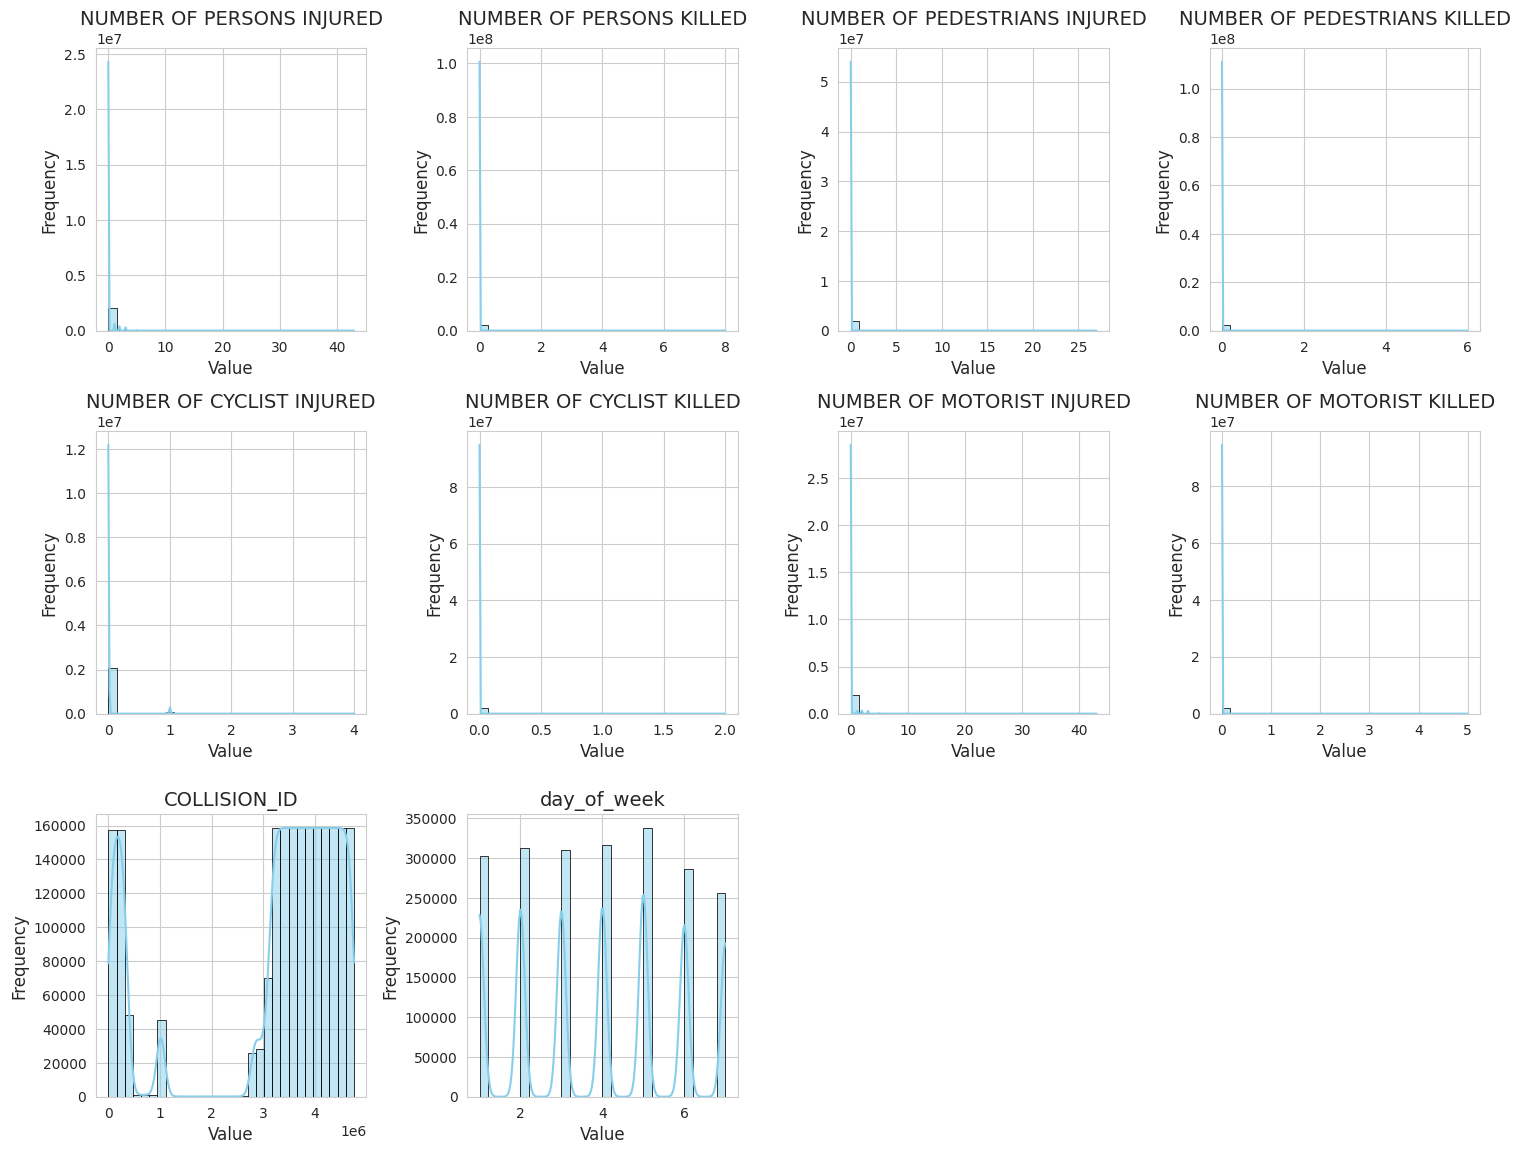

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a histogram for each numerical column in the DataFrame
plt.figure(figsize=(15, 15))

# Loop through each numerical column in the DataFrame
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, i + 1)  # Adjust the number of rows and columns as needed
    sns.histplot(df[column], bins=30, kde=True, color='skyblue', edgecolor='black')  # Add KDE for smoothness
    plt.title(column, fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()  # Adjusts subplot params for a nicer fit
plt.show()


1. Number of Persons Injured
Distribution: The histogram shows a right-skewed distribution, with most incidents resulting in fewer than 10 injuries, while a few cases have significantly higher injury counts.
Implication: This indicates that while most crashes are relatively minor, there are outliers with a considerably higher number of injuries. This skewness suggests a need for targeted interventions to manage severe incidents.

2. Number of Persons Killed
Distribution: Similar to injuries, the number of persons killed also shows a right-skewed distribution, with a vast majority of crashes resulting in zero to a few fatalities.
Implication: The data indicates that fatalities are rare compared to injuries. However, when fatalities do occur, they can significantly impact families and communities, highlighting the importance of preventive measures.

3. Number of Pedestrians Injured
Distribution: The distribution is again right-skewed, with most instances showing low injury counts.

4. Number of Pedestrians Killed
Distribution: This also exhibits a right-skewed distribution, with very few cases of pedestrian fatalities.


5. Number of Cyclist Injured
Distribution: The data shows a similar right-skewed pattern, indicating that while most incidents result in few injuries, there are some instances with significantly more.


6. Number of Cyclist Killed
Distribution: Right-skewed distribution with very few fatalities.


7. Number of Motorist Injured
Distribution: This distribution is also right-skewed, indicating a pattern similar to the other categories.
Implication: There is a significant concern for motorists' safety, and efforts should be made to analyze high-incident areas for targeted safety improvements.

8. Number of Motorist Killed
Distribution: Shows a right-skewed distribution with very few fatalities.
Implication: While fatalities are less frequent, they are significant events that can shape policy and public safety strategies.

9. Collision ID
Distribution: The distribution here indicates a high frequency of certain collision IDs, possibly indicating repeated incidents or specific types of collisions.

10. Day of Week
Distribution: The histogram shows peaks for certain days of the week, indicating patterns in crash occurrences.
Implication: Understanding when crashes are most likely to occur can help in planning targeted interventions.

#Bar Plots

## Total Number of Accidents by Month

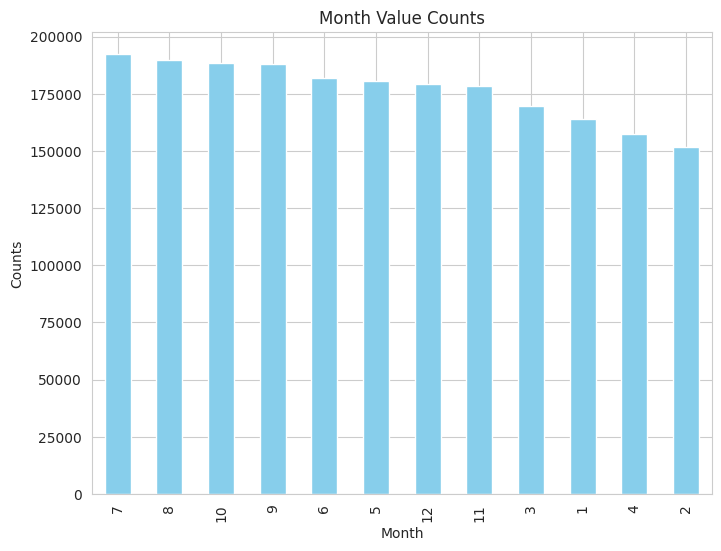

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_scaled['Month'] exists and contains categorical data
month_counts = df['Month'].value_counts()

# Create the plot
plt.figure(figsize=(8, 6))
month_counts.plot(kind='bar', color='skyblue')
plt.title('Month Value Counts')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

- The counts appear to be relatively consistent across the months, suggesting that accidents are distributed fairly evenly throughout the year.
- The highest counts are observed in the months of July and August, indicating potential spikes in accidents during the summer. This could be attributed to factors such as increased travel, outdoor activities, and possibly higher pedestrian and cyclist activity during these months.

## Total count of Boroughs(Locations in NYC)

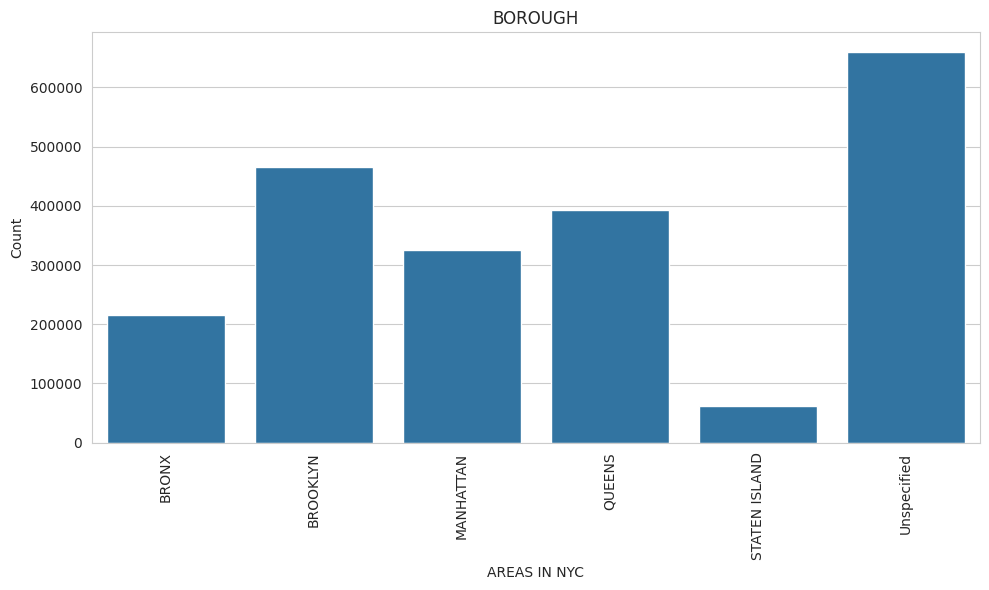

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_scaled is your DataFrame
# First, get the value counts for 'VEHICLE TYPE CODE 1'
vehicle_type_counts = df['BOROUGH'].value_counts()

# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=vehicle_type_counts.index, y=vehicle_type_counts.values)

# Customize the plot
plt.title('BOROUGH')
plt.xlabel('AREAS IN NYC')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()



- The Unspecified category has the highest count of accidents, which could indicate a significant portion of incidents where the specific borough is not recorded or is missing. This raises concerns about data completeness and the potential need for improved data collection methods.

- Brooklyn has the second-highest number of accidents, followed closely by Queens and Manhattan. This suggests that these boroughs have higher traffic volumes or possibly more incidents due to their population density and urban infrastructure.
- The Bronx has a notably lower count compared to Brooklyn, Queens, and Manhattan, indicating fewer recorded accidents or potentially different traffic conditions or safety measures.
- Staten Island has the lowest count, which might reflect its less dense population and fewer urban traffic challenges.
Implications:

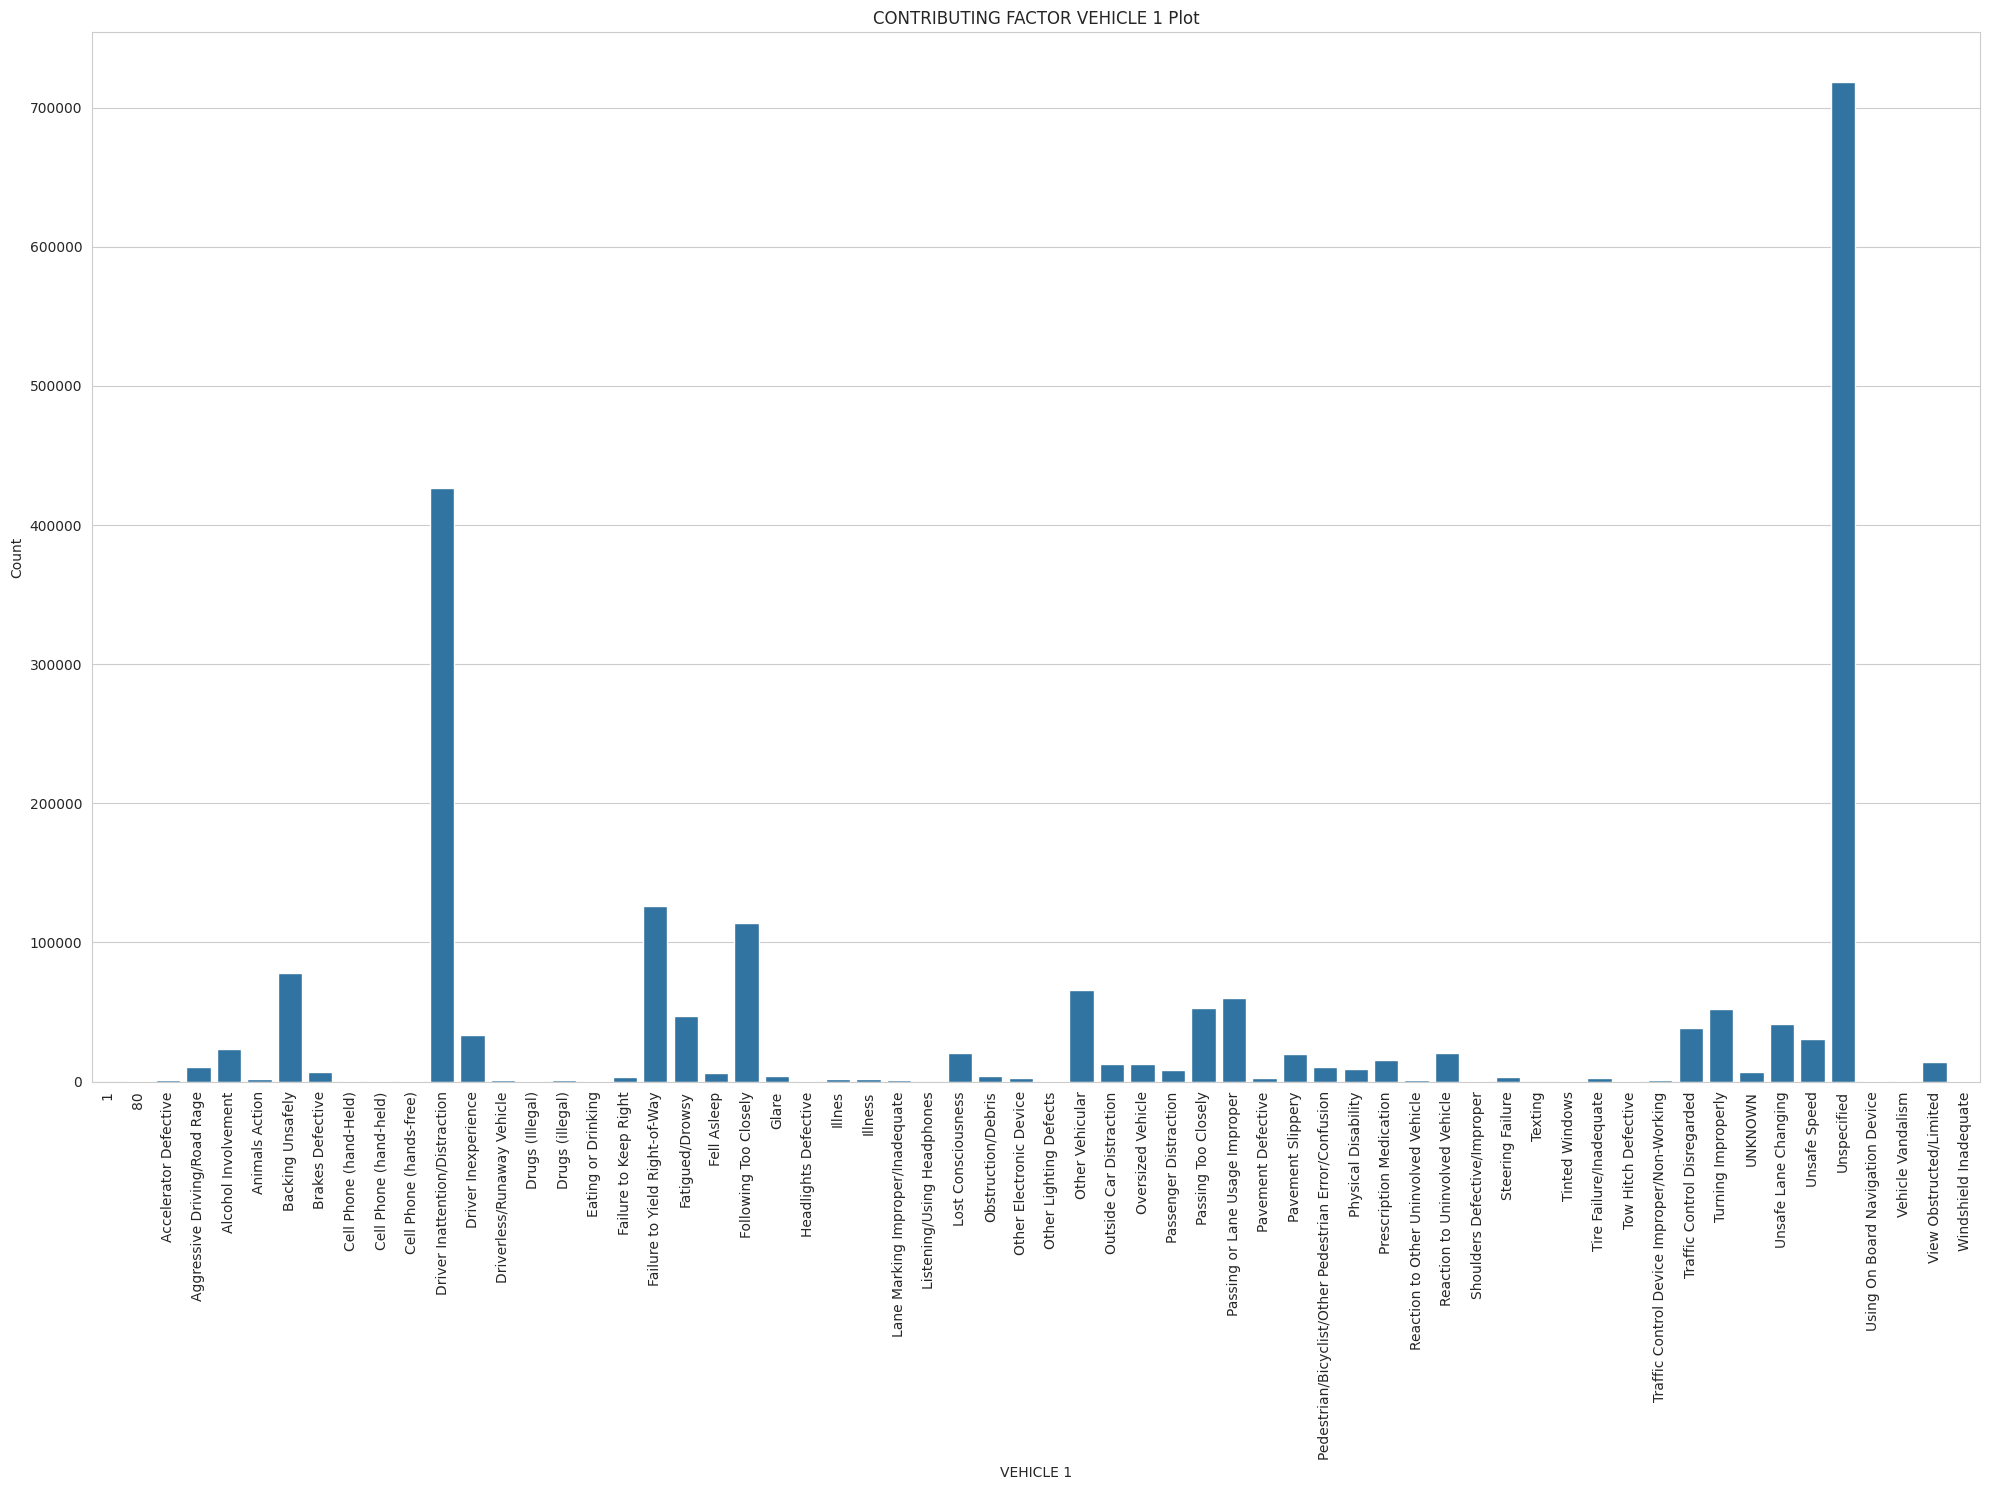

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_scaled is your DataFrame
# First, get the value counts for 'VEHICLE TYPE CODE 1'
vehicle_type_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Create a count plot using seaborn
plt.figure(figsize=(20, 15))
sns.barplot(x=vehicle_type_counts.index, y=vehicle_type_counts.values)

# Customize the plot
plt.title('CONTRIBUTING FACTOR VEHICLE 1 Plot')
plt.xlabel('VEHICLE 1')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

- Vehicle 1 highest contributing factor is unspecified, due to missing data that was not potentially recorded. Overall the the main contributing factor to the first vehicle is driver inattention/distraction which has a count of about 400300.
- The second highest contributer to Vehicle 1 is Failure to Yield Right of Way,which can suggest that appropiate signs, road marking are not visible, especially at critical intersections.

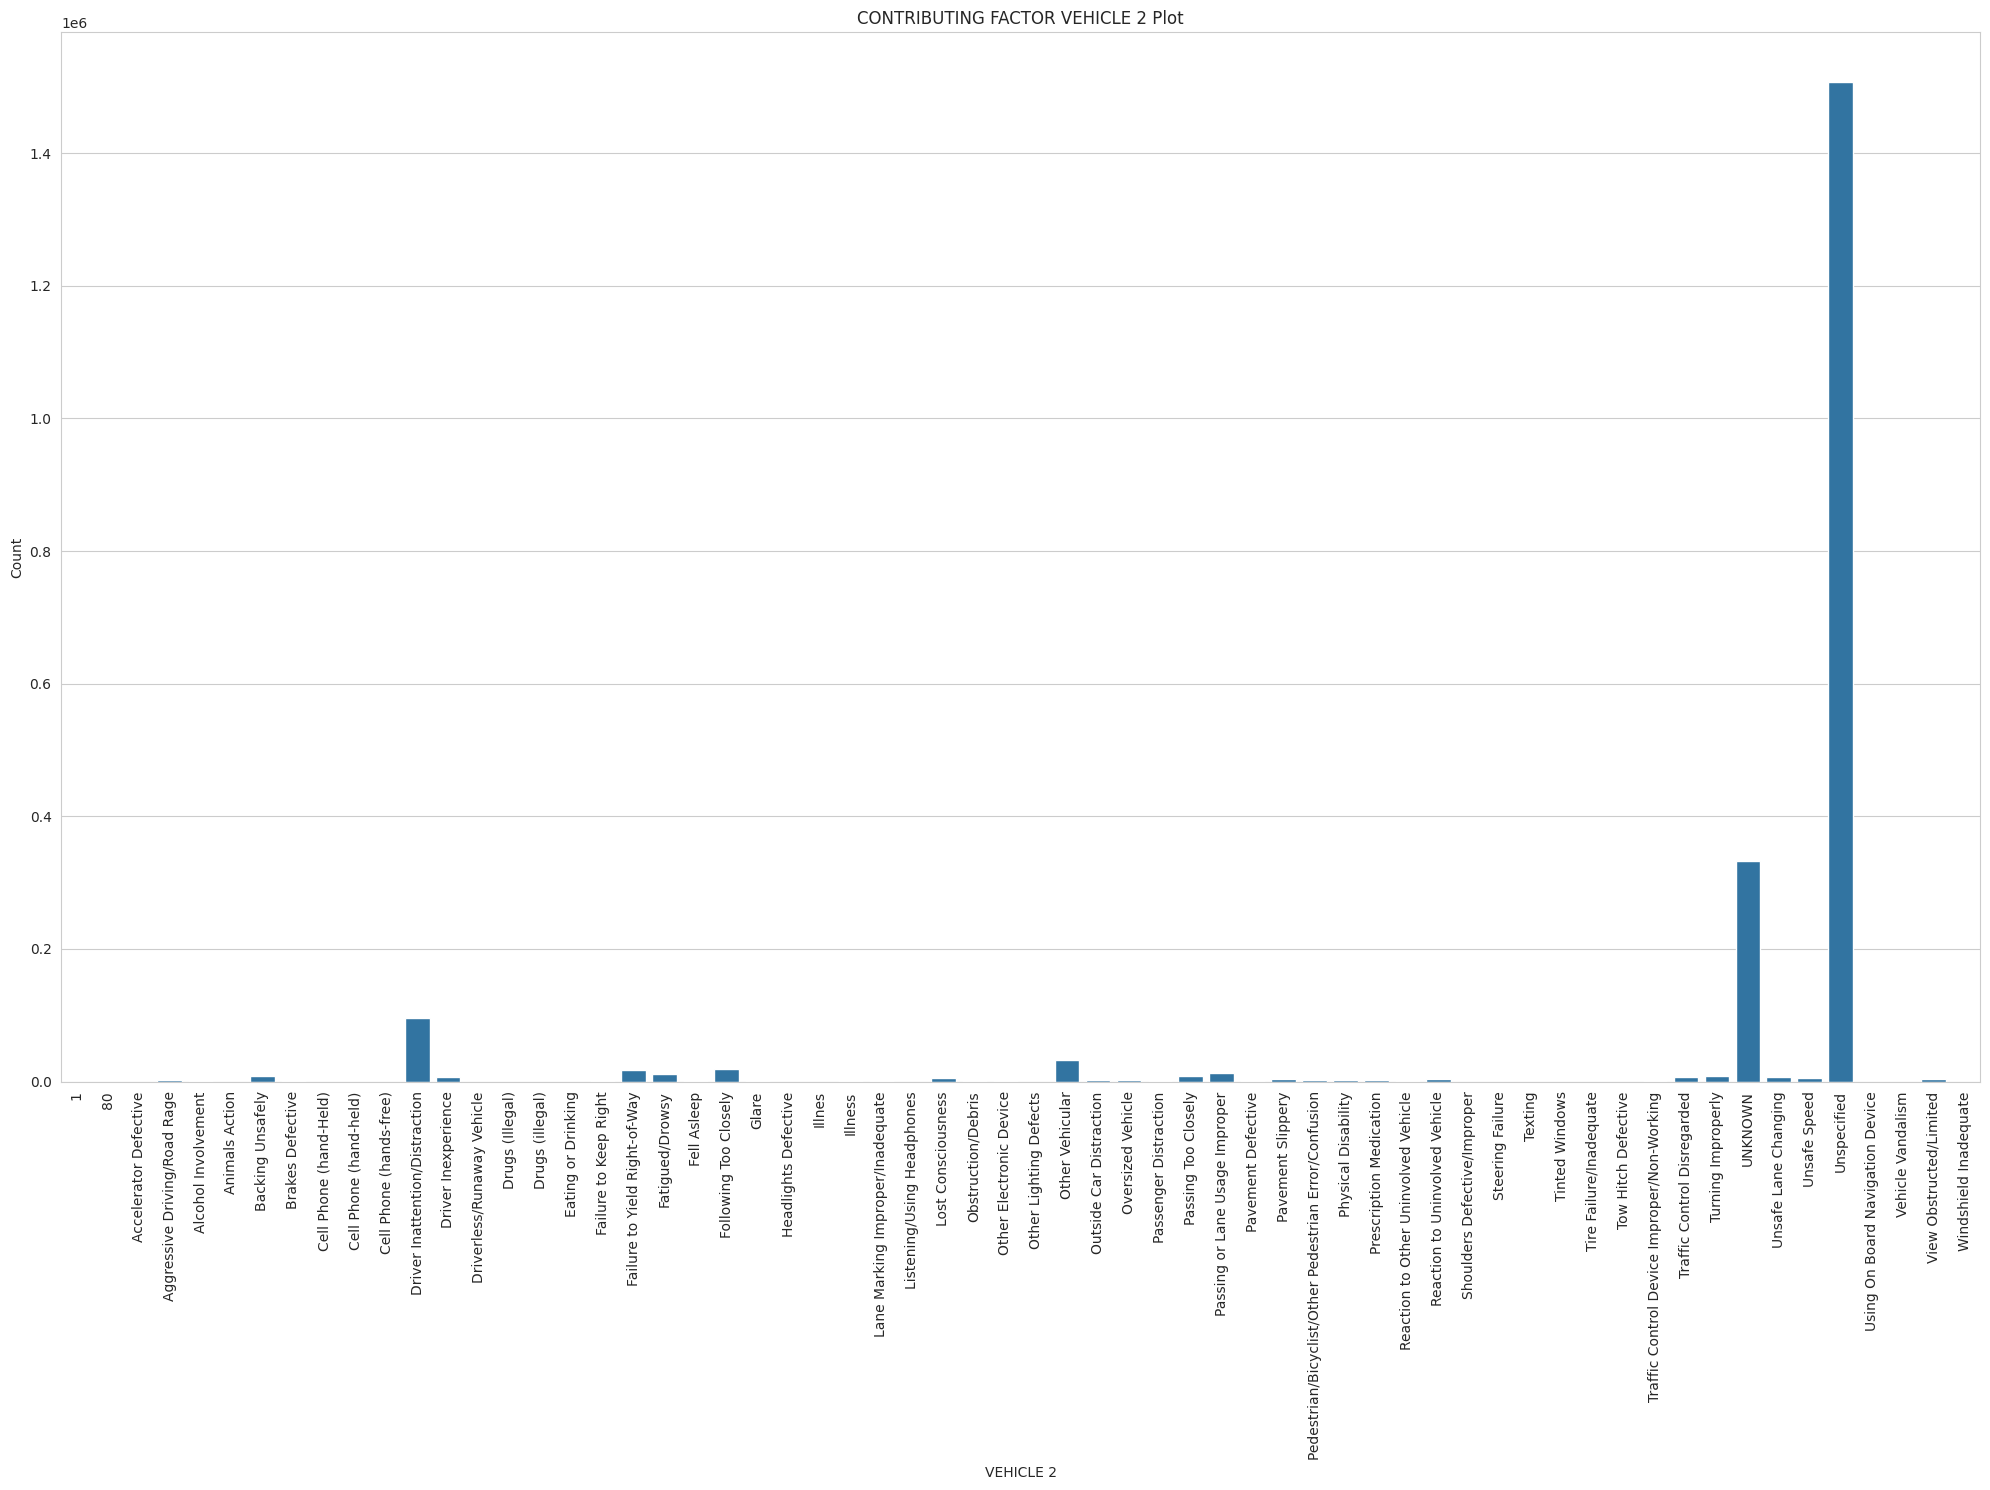

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_scaled is your DataFrame
# First, get the value counts for 'VEHICLE TYPE CODE 1'
vehicle_type_counts = df['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

# Create a count plot using seaborn
plt.figure(figsize=(20, 15))
sns.barplot(x=vehicle_type_counts.index, y=vehicle_type_counts.values)

# Customize the plot
plt.title('CONTRIBUTING FACTOR VEHICLE 2 Plot')
plt.xlabel('VEHICLE 2')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

- The highest count for Vehicle 2, is unspecified and unknown, this is missing data which is crucial to analyze trends and highlight areas of improvement in implementing safe driving.
- Apart from those being the highest counts, the primary contributing factor for Vehicle 2 is also driver inattention/ distraction. This similar to Vehicle 1's contributing factor which suggests that more drivers are not paying attention while driving which has lead to number of injuries and fatalities.

## Top 10 Cars for Each of the Vehicle Type Codes

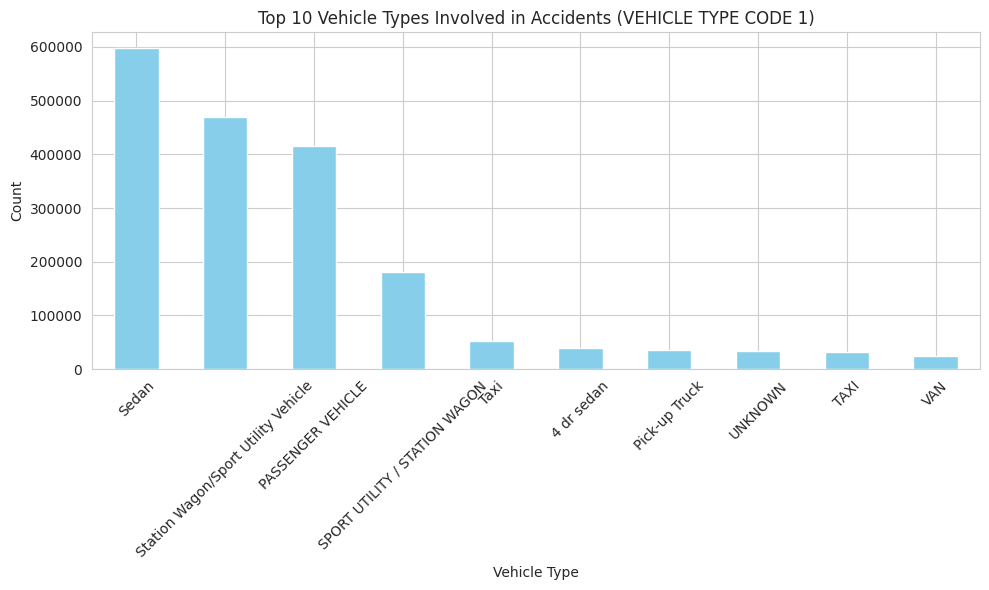

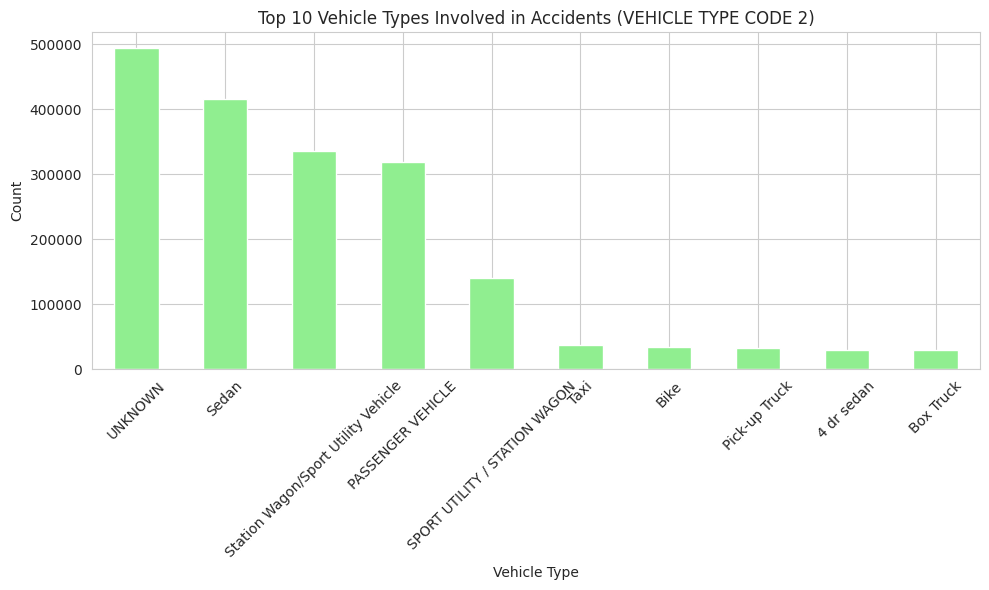

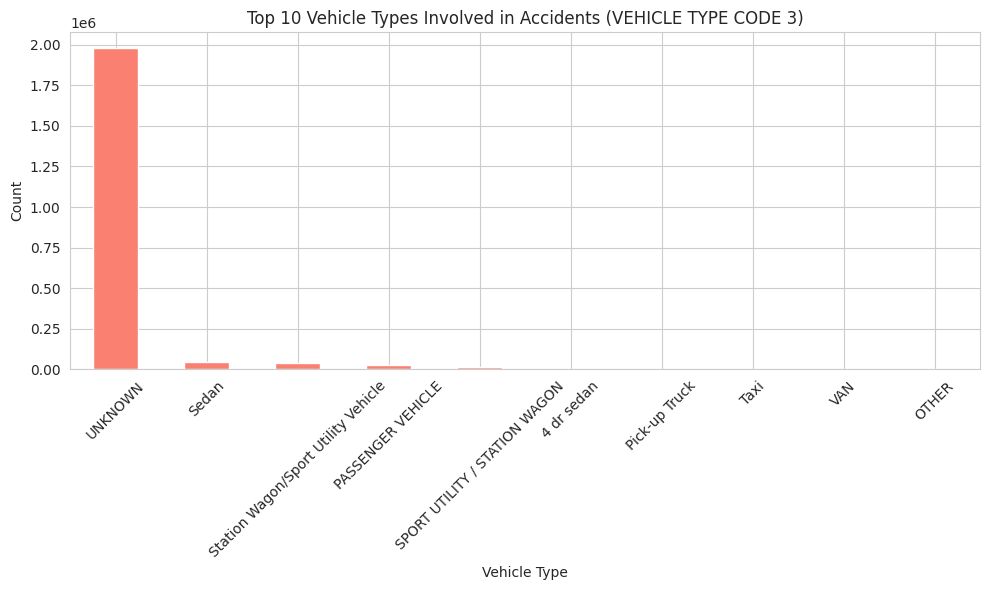

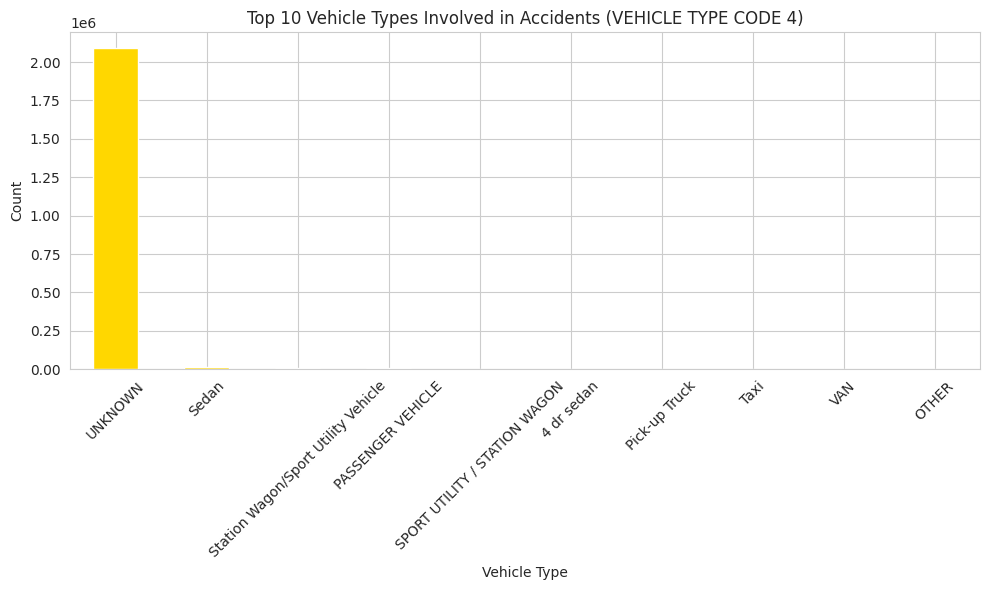

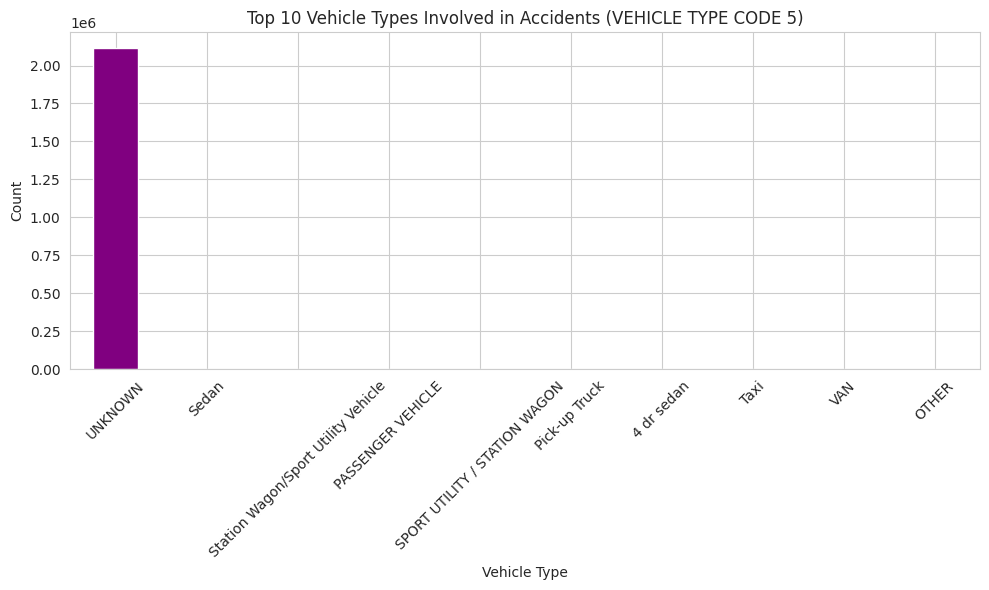

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Top 10 for VEHICLE TYPE CODE 1
plt.figure(figsize=(10, 6))
top_10_vehicle_type_code_1 = df['VEHICLE TYPE CODE 1'].value_counts().head(10)
top_10_vehicle_type_code_1.plot(kind='bar', color='skyblue')
plt.title('Top 10 Vehicle Types Involved in Accidents (VEHICLE TYPE CODE 1)')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 for VEHICLE TYPE CODE 2
plt.figure(figsize=(10, 6))
top_10_vehicle_type_code_2 = df['VEHICLE TYPE CODE 2'].value_counts().head(10)
top_10_vehicle_type_code_2.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Vehicle Types Involved in Accidents (VEHICLE TYPE CODE 2)')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 for VEHICLE TYPE CODE 3
plt.figure(figsize=(10, 6))
top_10_vehicle_type_code_3 = df['VEHICLE TYPE CODE 3'].value_counts().head(10)
top_10_vehicle_type_code_3.plot(kind='bar', color='salmon')
plt.title('Top 10 Vehicle Types Involved in Accidents (VEHICLE TYPE CODE 3)')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 for VEHICLE TYPE CODE 4
plt.figure(figsize=(10, 6))
top_10_vehicle_type_code_4 = df['VEHICLE TYPE CODE 4'].value_counts().head(10)
top_10_vehicle_type_code_4.plot(kind='bar', color='gold')
plt.title('Top 10 Vehicle Types Involved in Accidents (VEHICLE TYPE CODE 4)')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 for VEHICLE TYPE CODE 5
plt.figure(figsize=(10, 6))
top_10_vehicle_type_code_5 = df['VEHICLE TYPE CODE 5'].value_counts().head(10)
top_10_vehicle_type_code_5.plot(kind='bar', color='purple')
plt.title('Top 10 Vehicle Types Involved in Accidents (VEHICLE TYPE CODE 5)')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Looking at the barplots for the top 10 features that were involved in the accidents, the way the vehicle types were recorded were not consistent, which left room for repetition of similar cars but categorized as different type of car.

Vehicle Type Code 1:
- Sedan, Station Wagon/Sport utlity and Passenger Vehicle were most common vehicles involved in an accident. By the count we can see majority of the accidents occured with the first vehicle causing the accidents, with 600000+ count.

Vehicle Type Code 2:
- Unknown, Sedan and Station Wagon/Sport Utility were the most common vehicles within the crash, but overall count is as high as vehicle 1 of 500000+ count.

Vehicle Type Code 3:
- Unknown has the most, being it was undocumented at the scene of the accident with an overall count of 2.

Vehicle Type Code 4:
- Unknown has the most, being it was undocumented at the scene of the accident with an overall count of 2+.

Vehicle Type Code 5:
- Unknown has the most, being it was undocumented at the scene of the accident with an overall count of 2+.


Overall Vehicle Type Code 1 and Vehicle Type Code 2 are mainly the only vehicles involved in the accidents as the make up over 1 million. And that rarely Vehicle 3, 4 and 5 are involved.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df

# List of vehicle type columns
vehicle_columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

# Dictionary to store the value counts for each vehicle type code
vehicle_type_value_counts = {}

# Loop over each vehicle type column and calculate value counts
for col in vehicle_columns:
    vehicle_type_value_counts[col] = df[col].value_counts()

# Display the value counts for each vehicle type code
for col, counts in vehicle_type_value_counts.items():
    print(f"Value counts for {col}:\n{counts}\n")


Value counts for VEHICLE TYPE CODE 1:
VEHICLE TYPE CODE 1
Sedan                                  597257
Station Wagon/Sport Utility Vehicle    469583
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    52873
                                        ...  
2 TON                                       1
2 WHE                                       1
2 wheel sc                                  1
2- to                                       1
2000                                        1
Name: count, Length: 1710, dtype: int64

Value counts for VEHICLE TYPE CODE 2:
VEHICLE TYPE CODE 2
UNKNOWN                                493383
Sedan                                  415695
Station Wagon/Sport Utility Vehicle    335939
PASSENGER VEHICLE                      318607
SPORT UTILITY / STATION WAGON          140204
                                        ...  
17                                          1
18 WEELER      

## Total number of People Killed and Injured in Each Borough/Location

<ipython-input-126-59154cb2b9c7>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  borough_data = df.groupby('BOROUGH')[column].sum().reset_index()
<ipython-input-126-59154cb2b9c7>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  borough_data = df.groupby('BOROUGH')[column].sum().reset_index()
<ipython-input-126-59154cb2b9c7>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  borough_data = df.groupby('BOROUGH')[column].

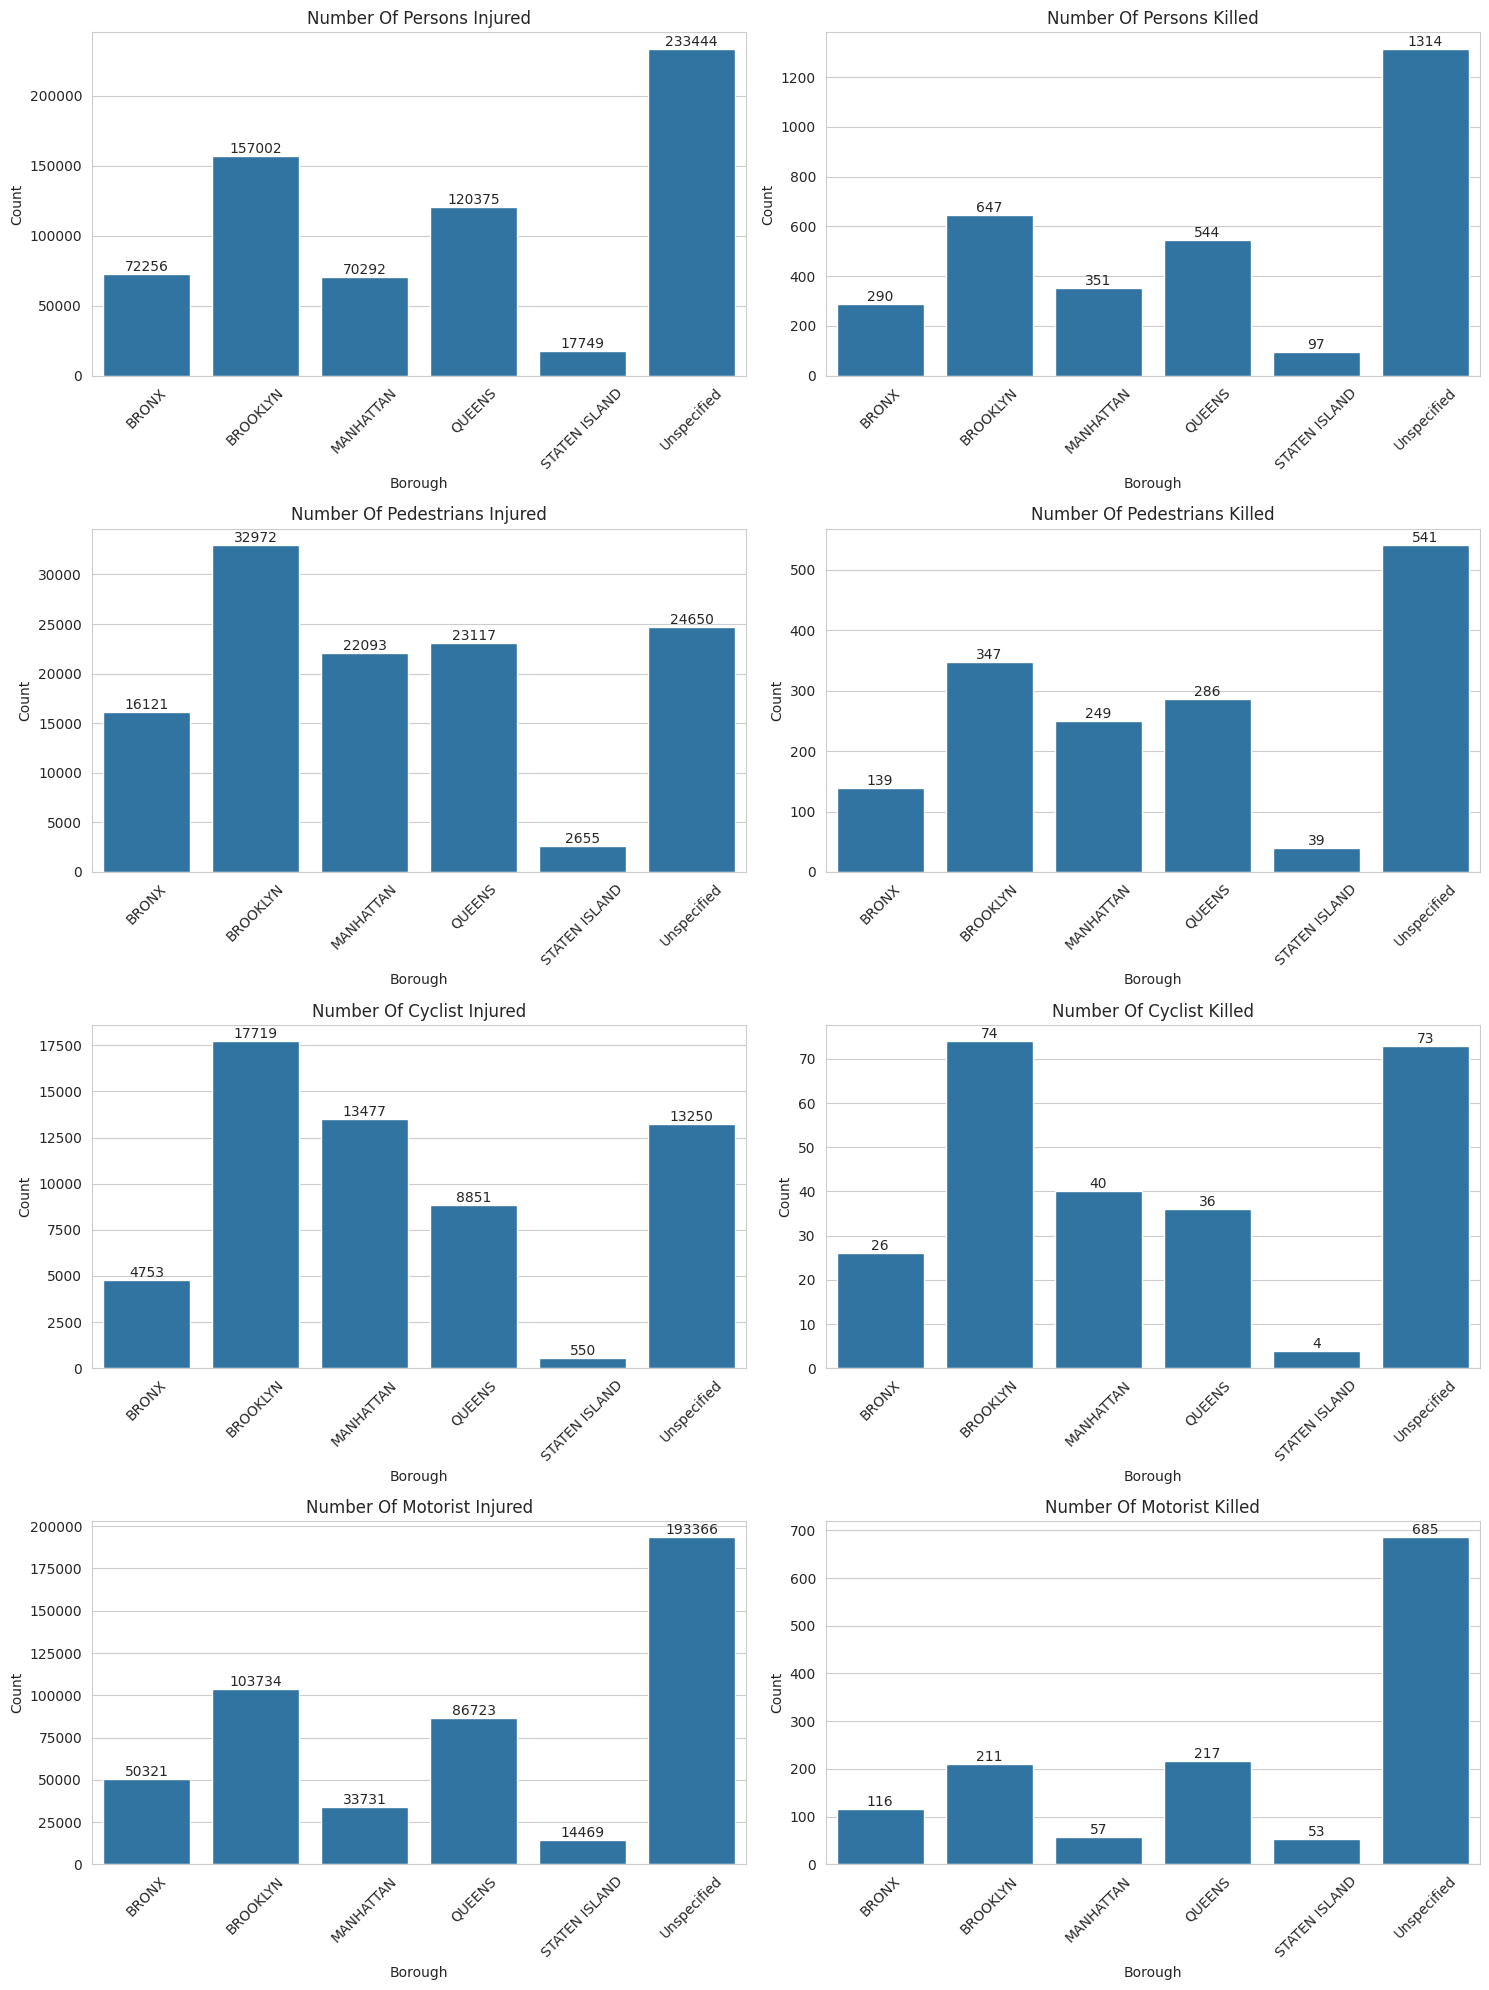

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED',
    'NUMBER OF MOTORIST KILLED'
]

# Create a figure for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes

# Generate bar plots for each category
for i, column in enumerate(columns_to_plot):
    # Group by 'BOROUGH' and sum the specified column
    borough_data = df.groupby('BOROUGH')[column].sum().reset_index()

    # Create a bar plot
    sns.barplot(x='BOROUGH', y=column, data=borough_data, ax=axes[i])

    # Customize the plot
    axes[i].set_title(column.replace('_', ' ').title())
    axes[i].set_xlabel('Borough')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Annotate the bars with the counts
    for j, value in enumerate(borough_data[column]):
        axes[i].text(j, value, int(value), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


1. Number of Persons Injured
Unspecified has the highest count, with over 233,000 injuries, followed by Brooklyn (157,002) and Queens (120,375).
Staten Island has the lowest number of persons injured, just under 18,000.
This suggests a possible data recording issue for Unspecified, and highlights Brooklyn and Queens as high-risk areas for injuries.

2. Number of Persons Killed
Unspecified again dominates, with 1,314 fatalities. Brooklyn follows with 647 deaths.
Staten Island and Bronx show much lower fatality rates, with Staten Island being the lowest (97).
The discrepancy with Unspecified likely indicates missing data or reporting inconsistencies.

3. Number of Pedestrians Injured
Brooklyn shows the highest number of pedestrian injuries (32,972), followed by Queens (24,650) and Manhattan (22,093).
Staten Island has notably fewer pedestrian injuries (2,655), reflecting either fewer incidents or less pedestrian traffic.

4. Number of Pedestrians Killed
Unspecified shows the highest count with 541 pedestrian fatalities.
Brooklyn also ranks high with 347, followed by Queens (286) and Manhattan (249).
Staten Island has the lowest fatalities, showing only 39 deaths.

5. Number of Cyclists Injured
Brooklyn leads with 17,719 cyclist injuries, followed by Unspecified (13,250).
Staten Island has very few cyclist injuries (550), indicating fewer cyclists or incidents in this borough.

6. Number of Cyclists Killed
The fatalities are highest in Unspecified (73), close to Brooklyn (74).
Manhattan and Queens report similar numbers (40 and 36 respectively).
Staten Island has the lowest cyclist fatalities (4).

7. Number of Motorists Injured
Unspecified tops this category (193,366), with Brooklyn coming second (103,734).
Staten Island has relatively fewer motorist injuries, at just over 14,000.

8. Number of Motorists Killed
Unspecified again shows the highest number of fatalities (685).
Brooklyn, Queens, and Bronx have similar fatality counts between 211 and 217.
Staten Island has the lowest fatality rate (53).

# Bivariate Analysis

## Correlation Matrix

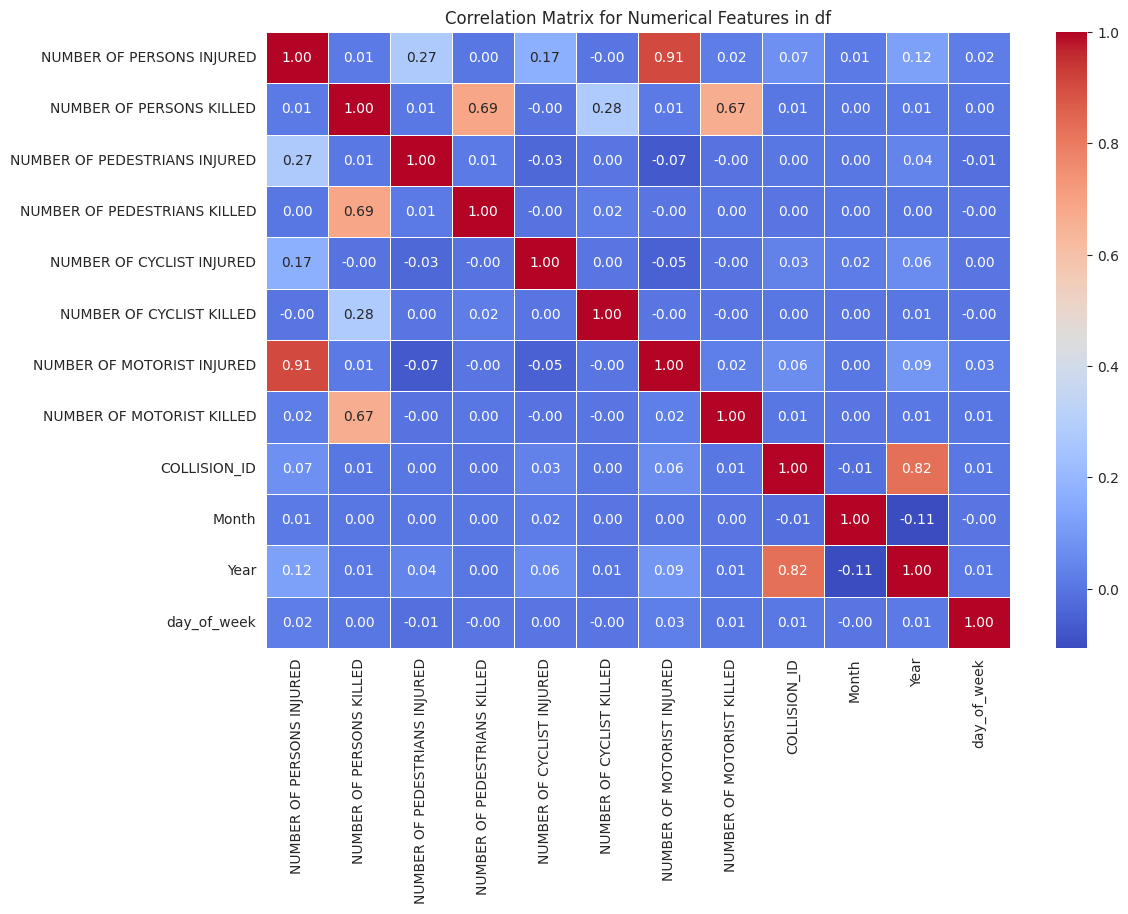

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and contains mixed data types

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64','int32'])

# Calculate the correlation matrix for numerical features
corr_matrix = numerical_df.corr()

# Display the correlation matrix using a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features in df')
plt.show()


- Number of Motorist and the Number of of Persons injured is highely correlated with 0.91: A strong correlation like this suggests that motorist injuries are a significant contributor to overall injuries in crashes. In accident scenarios, when motorists are injured, it is likely that other individuals (like pedestrians, cyclists, etc.) are also injured, leading to a higher total injury count.
- This also means that as the number of motorists injured increases, the number of persons injured tends to increase as well.

- Collision ID and Year are strongly correlated as well with 0.82, although these may be correlated, it does not give sufficient analysis as Collison ID is a form of identification and Year suggest the year the collision occured.

# Scatterplots

## Number of Motorist Injured vs Number of Persons Injured (Highest correlation)

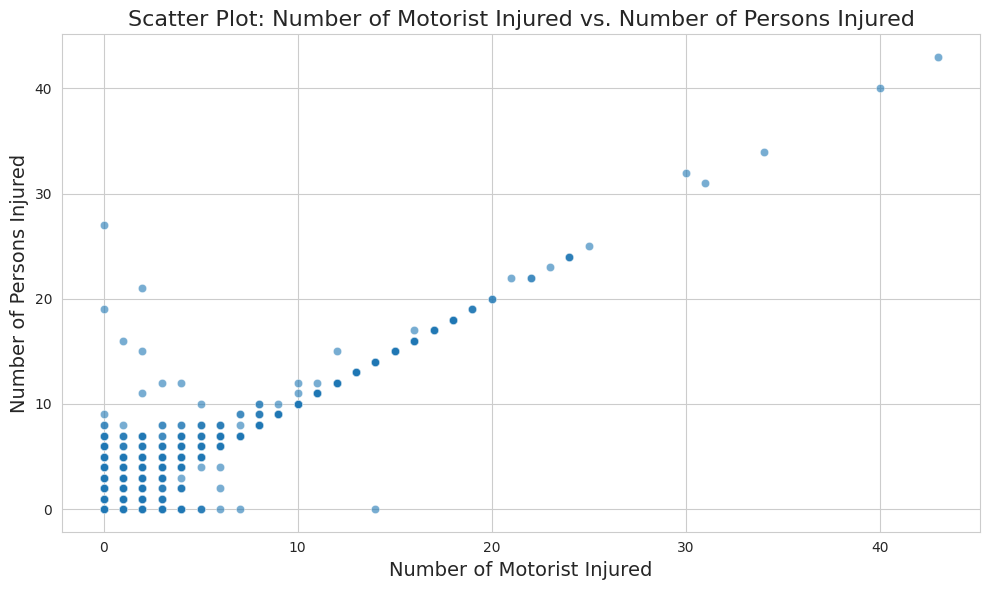

In [ ]:
plt.figure(figsize=(10, 6))

# Step 2: Create a scatter plot using seaborn
sns.scatterplot(data=df, x='NUMBER OF MOTORIST INJURED', y='NUMBER OF PERSONS INJURED', alpha=0.6)

# Step 3: Set titles and labels
plt.title('Scatter Plot: Number of Motorist Injured vs. Number of Persons Injured', fontsize=16)
plt.xlabel('Number of Motorist Injured', fontsize=14)
plt.ylabel('Number of Persons Injured', fontsize=14)

# Step 4: Show grid for better readability
plt.grid(True)

# Step 5: Display the scatter plot
plt.tight_layout()
plt.show()

- There is a high concentration of points at the lower end, particularly between 0 and 10 motorists injured. This suggests that in most incidents, few motorists are injured, and correspondingly, fewer persons are injured.
- A cluster of data points is visible around 0-10 on the x-axis, with the number of persons injured varying widely, ranging from 0 to around 20.
- Accidents involving more motorists are likely to also involve more overall persons injured, indicating that large-scale accidents affect both motorists and others (e.g., passengers, pedestrians) in a correlated manner.


## Total Accidents vs Borough (Area)

<ipython-input-129-02508f77643d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_counts_by_borough = df.groupby('BOROUGH')['COLLISION_ID'].nunique().reset_index()
<ipython-input-129-02508f77643d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BOROUGH', y='TOTAL ACCIDENTS', data=accident_counts_by_borough, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/loca

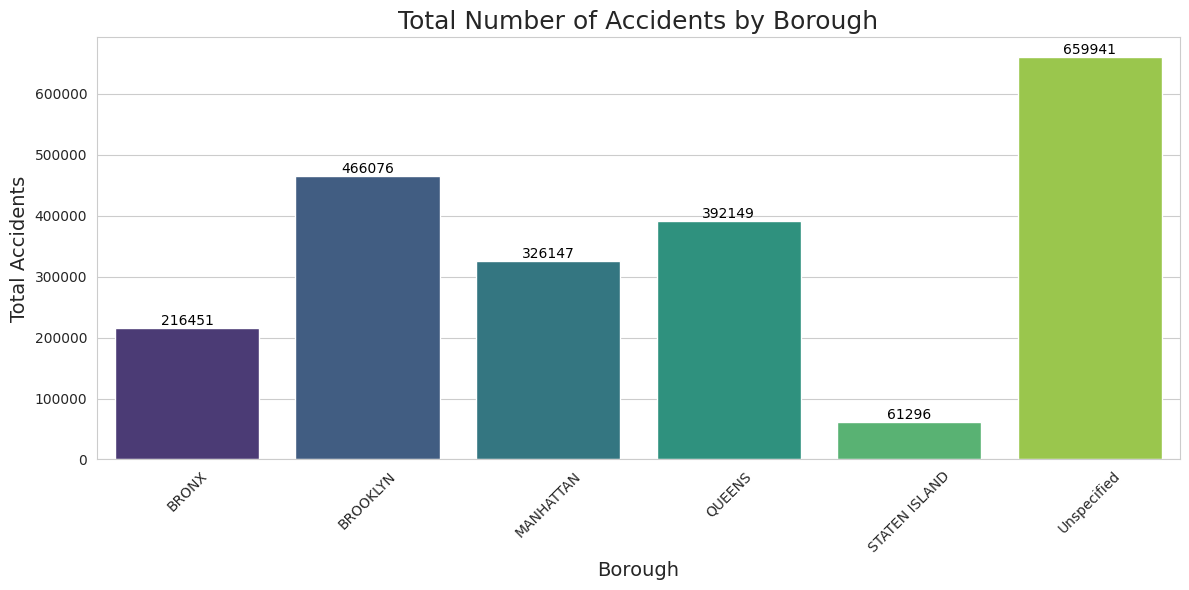

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'BOROUGH' is the column name representing the boroughs
# Group by borough and count unique COLLISION IDs to get total accidents per borough
accident_counts_by_borough = df.groupby('BOROUGH')['COLLISION_ID'].nunique().reset_index()

# Rename the columns for clarity
accident_counts_by_borough.columns = ['BOROUGH', 'TOTAL ACCIDENTS']

# Create a bar plot to visualize total accidents by borough
plt.figure(figsize=(12, 6))
sns.barplot(x='BOROUGH', y='TOTAL ACCIDENTS', data=accident_counts_by_borough, palette='viridis')

# Customize the plot
plt.title('Total Number of Accidents by Borough', fontsize=18)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Total Accidents', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Annotate the bars with the total accidents count
for index, row in accident_counts_by_borough.iterrows():
    plt.text(index, row['TOTAL ACCIDENTS'],
             str(row['TOTAL ACCIDENTS']),
             color='black', fontsize=10, ha='center', va='bottom')


# Show the plot
plt.show()

- Unspecified Data:
The largest number of accidents is categorized as "Unspecified," with a total of 659,941 accidents. This is significantly higher than any specific borough. The large number of unspecified cases suggests missing or unrecorded borough information in the dataset, which might need further investigation or cleaning.
Brooklyn Leads in Specific Boroughs:

- Among the specific boroughs, Brooklyn has the highest number of accidents, with 466,076 accidents, which makes it the most accident-prone borough based on this dataset.
Queens and Manhattan:

- Queens follows Brooklyn, with 392,149 accidents, while Manhattan has 326,147 accidents. Both boroughs have substantial numbers, though less than Brooklyn.
Bronx:

- The Bronx has a noticeably lower number of accidents compared to Brooklyn, Manhattan, and Queens, with 216,451 accidents.
Staten Island:

- Staten Island reports the fewest accidents among the boroughs, with 61,296 accidents. This is significantly lower than the other boroughs, possibly due to its smaller population and geographical size.

- Insights:
Brooklyn and Queens have the highest number of reported accidents, possibly reflecting higher population densities and traffic volumes in these areas.
The high number of unspecified boroughs in the data is a concern and indicates potential issues with data reporting or collection.


## Total Accidents vs Crash Date ( Between 2012 -2024)

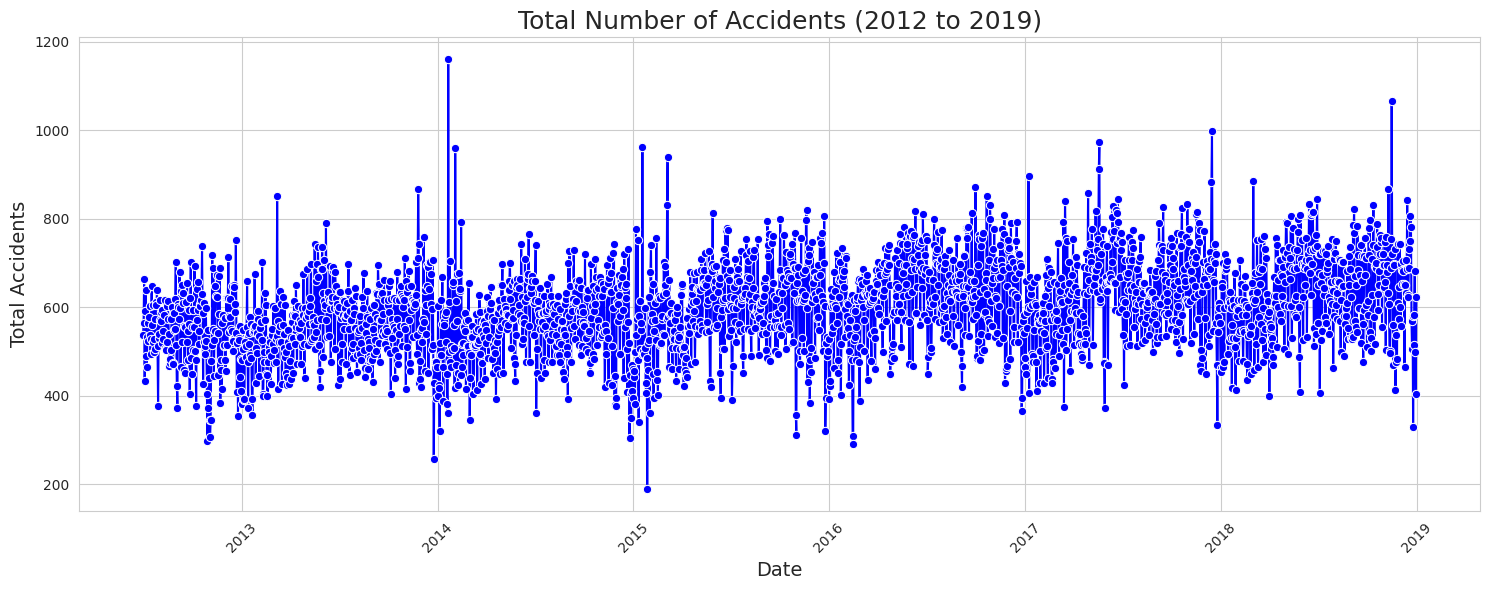

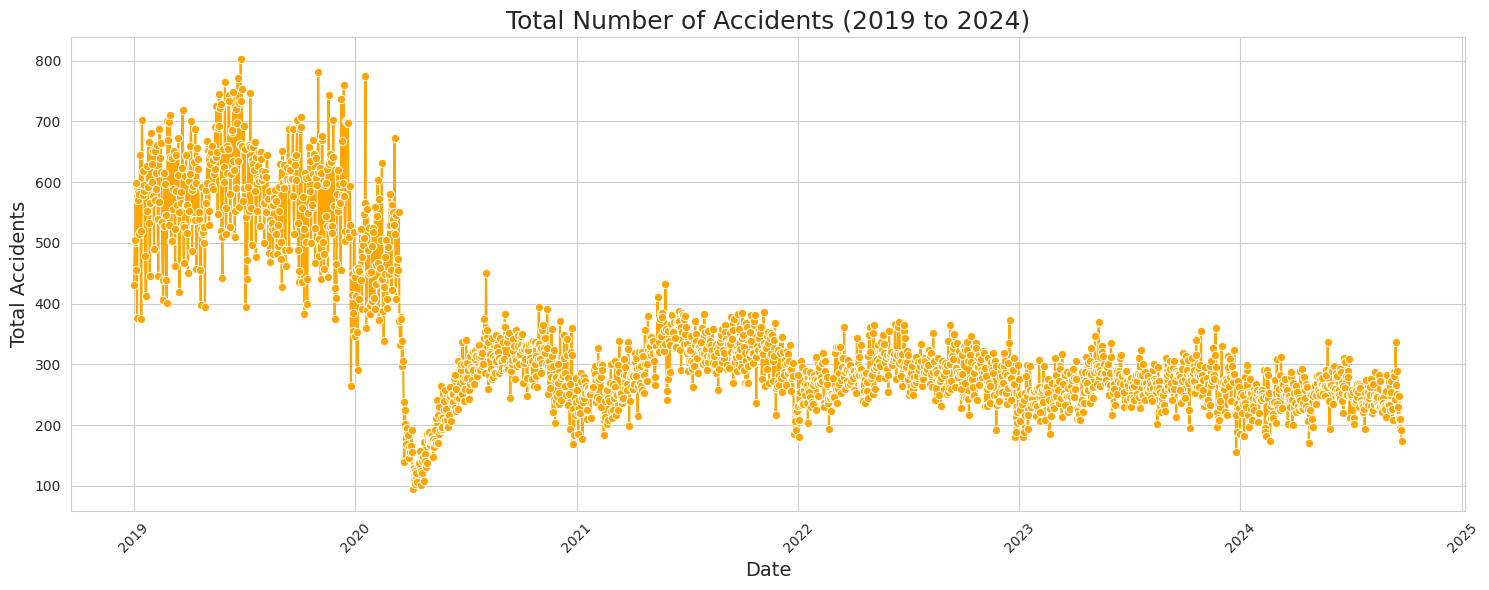

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a date column for when the accidents occurred
# Replace 'CRASH DATE' with the actual column name if it's different
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Group by date and count unique COLLISION IDs to get total accidents per day
accident_counts_by_date = df.groupby('CRASH DATE')['COLLISION_ID'].nunique().reset_index()

# Rename the columns for clarity
accident_counts_by_date.columns = ['CRASH DATE', 'TOTAL ACCIDENTS']

# Filter data for the first graph (2012 to 2018)
accident_counts_2012_2018 = accident_counts_by_date[(accident_counts_by_date['CRASH DATE'] >= '2012-01-01') &
                                                     (accident_counts_by_date['CRASH DATE'] <= '2018-12-31')]

# Filter data for the second graph (2018 to 2024)
accident_counts_2018_2024 = accident_counts_by_date[(accident_counts_by_date['CRASH DATE'] >= '2019-01-01') &
                                                      (accident_counts_by_date['CRASH DATE'] <= '2024-12-31')]

# Create the first graph (2012 to 2018)
plt.figure(figsize=(15, 6))
sns.lineplot(x='CRASH DATE', y='TOTAL ACCIDENTS', data=accident_counts_2012_2018, marker='o', color='blue')
plt.title('Total Number of Accidents (2012 to 2019)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Create the second graph (2019 to 2024)
plt.figure(figsize=(15, 6))
sns.lineplot(x='CRASH DATE', y='TOTAL ACCIDENTS', data=accident_counts_2018_2024, marker='o', color='orange')
plt.title('Total Number of Accidents (2019 to 2024)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Blue Line chart from 2012 to 2019:**
- Fluctuation of Accidents:
The graph shows significant daily fluctuations in the number of accidents. While most points hover between 400 and 700 accidents per day, there are several spikes (above 800 accidents), indicating days with notably higher accident numbers.
- There are also days with dips below 400, indicating days with fewer accidents.
- A general trend that I have seen from 2012 to 2019, the high spike of accidents occur in December and January, which are the holiday seasons ( Christmas/New Years), the weather road conditions are relatively bad.


**Orange Line Chart 2019 - 2024:**
- From 2020 to 2024, the number of accidents have relatively decreased, which could be due to Covid-19 less people were driving and the petrol prices increased exponetially. Gradually in 2022, the number of accidents increased although lower than 2012-2019.
- Between 2019 and 2020, the avreage number of accidents were between 400 and 800 accidents. The from 2020 to 2024, the number of accidents decreased between 100 and 400.


## Total Number of Accidents vs Day of the week

<ipython-input-131-3ed98174fc1f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='Total Accidents', data=daily_accidents, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning

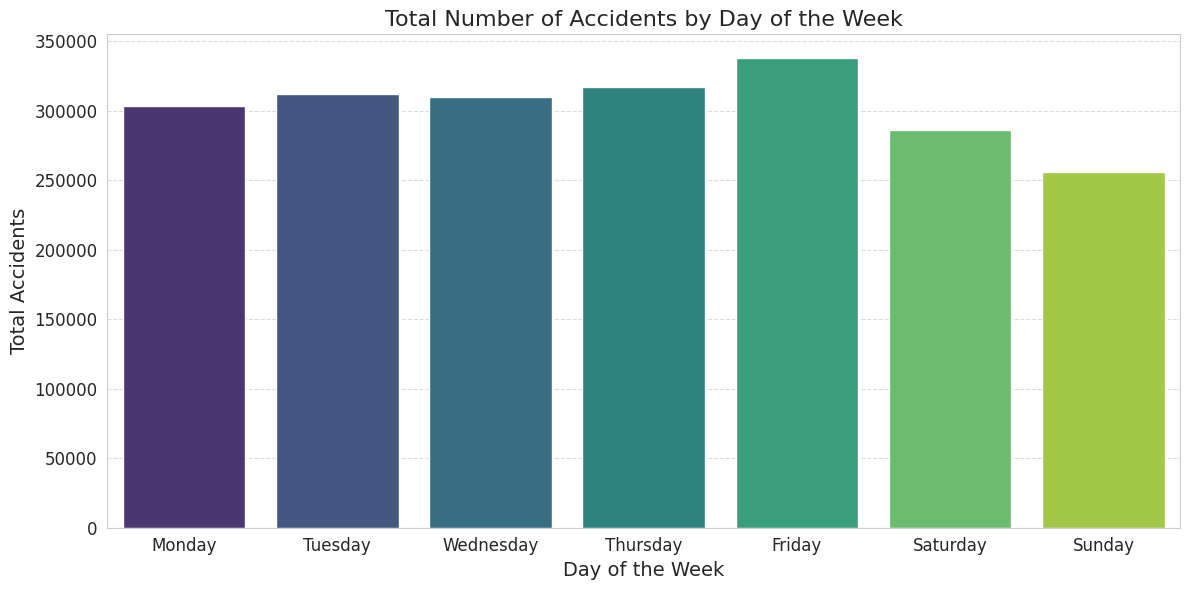

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'CRASH DATE' is in the correct datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Extract the day of the week from 'CRASH DATE'
df['day_of_week'] = df['CRASH DATE'].dt.day_name()

# Group by day of the week and count unique COLLISION IDs to get total accidents per day
daily_accidents = df.groupby('day_of_week')['COLLISION_ID'].nunique().reset_index()

# Rename columns for clarity
daily_accidents.columns = ['day_of_week', 'Total Accidents']

# Order the days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_accidents['day_of_week'] = pd.Categorical(daily_accidents['day_of_week'], categories=order, ordered=True)
daily_accidents = daily_accidents.sort_values('day_of_week')

# Create a bar chart to visualize total accidents by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='Total Accidents', data=daily_accidents, palette='viridis')

# Customize the plot
plt.title('Total Number of Accidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Accidents', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


- Between 2012 to 2024, the total number of 300300 accidents occurred on a Friday.
- Fridays may have a higher traffic volume, leading to more accidents. Many people travel on Fridays, either for weekend trips, social activities, or leaving work at the end of the week, resulting in heavier traffic. This increase in traffic naturally correlates with a higher likelihood of accidents.
- People may experience end-of-week fatigue after a long work or school week. Fatigue can contribute to poorer decision-making, slower reaction times, or distracted driving, all of which may increase the chances of accidents occurring.
- This explains the contributing factor vehicle 1 and 2, main caused of accdident is driver inattention/ distraction which explains why majority of the accidents occur on Friday.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

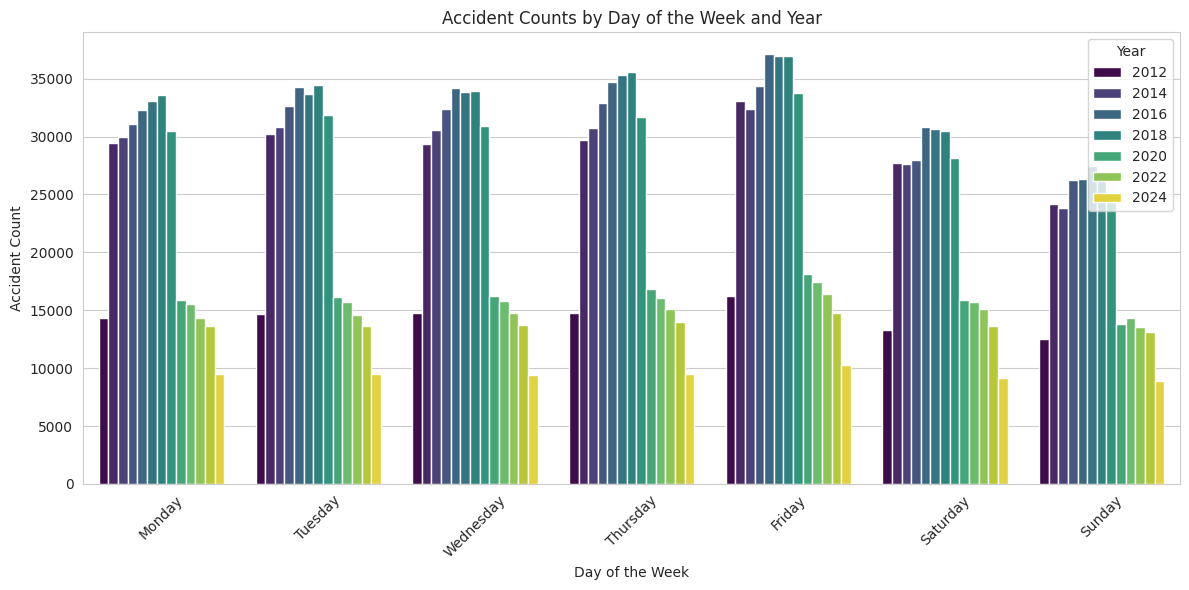

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'CRASH DATE' is in datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Extract day of the week and year
df['DAY OF WEEK'] = df['CRASH DATE'].dt.day_name()  # Get the name of the day
df['YEAR'] = df['CRASH DATE'].dt.year  # Extract the year

# Count accidents by DAY OF WEEK and YEAR
day_year_counts = df.groupby(['YEAR', 'DAY OF WEEK']).size().reset_index(name='COUNT')

# Reorder the days of the week for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_year_counts['DAY OF WEEK'] = pd.Categorical(day_year_counts['DAY OF WEEK'], categories=day_order, ordered=True)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='DAY OF WEEK', y='COUNT', hue='YEAR', data=day_year_counts, palette='viridis')

# Customize the plot
plt.title('Accident Counts by Day of the Week and Year')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.legend(title='Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


1. Monday:
Accident counts have been relatively high on Mondays across all years.
2016 and 2018 are years with the highest accident counts, peaking close to 35,000.
As the years progress, you see a decrease in accidents in more recent years, with 2024 showing significantly lower counts, around 15,000.
2. Tuesday:
Tuesdays also experience high accident counts, similar to Mondays.
2016 and 2018 again show the highest counts, with totals around 35,000.
For 2024, the number of accidents drops to roughly 15,000, showing a clear decline in recent years.
3. Wednesday:
The accident count on Wednesdays follows a similar trend as Monday and Tuesday, with 2016 and 2018 still being the peak years, approaching 35,000.
2024 shows fewer accidents, indicating that recent years have seen lower accident numbers, in the 15,000-20,000 range.
4. Thursday:
Thursdays exhibit high accident counts in 2016 and 2018, in the range of 35,000.
There is a sharp decrease by 2024, showing accident numbers around 15,000, following the same trend seen for the earlier weekdays.
5. Friday:
Fridays show the highest accident counts of any day of the week, especially in 2016 and 2018, where counts exceed 35,000.
As with other weekdays, the number of accidents decreases over the years, with 2024 showing a drop to just below 20,000.
6. Saturday:
Accident counts on Saturdays are lower than on weekdays, but 2016 and 2018 still peak at around 30,000.
The decrease over the years is very noticeable, with 2024 showing accident counts in the range of 10,000-15,000.
7. Sunday:
Sundays have the lowest accident counts overall compared to the other days of the week.
In 2016 and 2018, Sunday accidents are around 25,000, but as the years progress, particularly in 2024, accidents drop to around 10,000.
Year-over-Year Trend:
Across all days, the years 2016 and 2018 are consistently showing the highest accident counts, while 2024 marks a significant drop in accidents across all days.
The overall trend seems to suggest that over time, there may have been changes, perhaps in road safety, driving behavior, or other external factors (such as lockdowns during 2020), that have contributed to the decrease in accidents in recent years.

## Hypothesis

The number of persons injured and the number of motorist injured is highly associated with borough ( which the area within NYC where the crash occured)

## Pairplot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the pairplot
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Create a pairplot using only the numerical columns
sns.pairplot(numerical_df)

# Show the plot
plt.show()


- NUMBER OF PERSONS INJURED: Positively correlates with NUMBER OF MOTORIST INJURED, as accidents with injuries often involve motorists.
- NUMBER OF PERSONS KILLED: No strong correlation with other variables, reflecting that fatalities are rare and not closely tied to the number of injuries.
- NUMBER OF PEDESTRIANS INJURED: Weak correlation with NUMBER OF PERSONS INJURED, indicating some accidents involve pedestrians, but it's not common.
- NUMBER OF PEDESTRIANS KILLED: Some correlation with NUMBER OF PEDESTRIANS INJURED, as more severe accidents may involve pedestrian fatalities.
- NUMBER OF CYCLIST INJURED: No significant relationships with other injury or fatality variables, showing that cyclist-involved accidents are uncommon.
- NUMBER OF CYCLIST KILLED: Slight correlation with CYCLIST INJURED, indicating that fatal cyclist accidents may also cause injuries.
- NUMBER OF MOTORIST INJURED: Strongly correlated with NUMBER OF PERSONS INJURED, as motorists are frequently injured in accidents involving many people.
- NUMBER OF MOTORIST KILLED: Weak correlation with NUMBER OF PERSONS KILLED, reflecting rare fatalities.
- COLLISION_ID: No meaningful correlation with other variables, as it's likely an identifier.
- In general, injuries (especially involving motorists) are more common, while fatalities across categories are rare, with no strong cross-variable patterns.

# Multivariate Analysis

## Number of Motorist injured vs Number of Persons Injured Colored by Borough

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'target' is the column name for your target variable (e.g., 'BOROUGH')
# If you have a specific target column, replace 'target' with that column name.
# For demonstration, I'll use 'BOROUGH' as the target variable.

plt.figure(figsize=(10, 6))

# Step 1: Create a scatter plot using seaborn with color by target variable
sns.scatterplot(data=df, x='NUMBER OF MOTORIST INJURED', y='NUMBER OF PERSONS INJURED',
                hue='BOROUGH', alpha=0.6, palette='Set1', style='BOROUGH')

# Step 2: Set titles and labels
plt.title('Scatter Plot: Number of Motorist Injured vs. Number of Persons Injured', fontsize=16)
plt.xlabel('Number of Motorist Injured', fontsize=14)
plt.ylabel('Number of Persons Injured', fontsize=14)

# Step 3: Show grid for better readability
plt.grid(True)

# Step 4: Display the scatter plot with a legend
plt.tight_layout()
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
plt.show()


- Positive Correlation: There is a strong positive linear relationship between the number of motorists injured and the total number of persons injured. As the number of motorists injured increases, the number of persons injured also tends to increase.

- BROOKLYN and MANHATTAN seem to have many cases with lower numbers of injuries.
- QUEENS has fewer cases overall but some with higher numbers of injuries.
- BRONX and STATEN ISLAND appear scattered across various injury counts, with BRONX showing some extreme outliers.
- The Unspecified category has a few data points spread across, including some higher values for injuries.

## Number of persons injured vs Number of Persons Killed Colored by Borough

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(12, 8))

# Scatter plot for Number of Persons Injured vs Number of Persons Killed, colored by Borough
sns.scatterplot(x='NUMBER OF PERSONS INJURED',
                y='NUMBER OF PERSONS KILLED',
                hue='BOROUGH',
                data=df,
                palette='Set1',  # You can use a different color palette if you prefer
                alpha=0.8,       # Transparency of the points
                s=100)           # Size of the points

# Customize the plot
plt.title('Number of Persons Injured vs Number of Persons Killed, Colored by Borough')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Number of Persons Killed')
plt.legend(title='Borough')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


- According to the scatterplot, it is evident that the number of persons killed and number of persons injured in a certain borough was unspecified/ undocumented when the accident occurred.
- The number persons injured are clustered aroung 0-25, while the number of persons killed is between 0-5, this indicates that there more people having injuries and fewer fatalities.
- The scatterplot also shows that the number of persons injured and the number of persons killed have few outliers. For the number of persons killed had relatively 1 outlier, which occured in Manhattan which could indicate it was relatively bad fatality.
- The number of persons injured had more outliers, which can indicate that in Queens, Brooklyn and Bronx, these boroughs may have seen incidents with more severe injuries compared to other locations.
- The second highest Borough which had more people injured and people killed was Bronx.


## Number of Cyclist Injured vs Number of Cyclist Killed Colored by Borough

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NUMBER OF CYCLIST INJURED',
                y='NUMBER OF CYCLIST KILLED',
                hue='BOROUGH',
                data=df,
                palette='Set2',
                s=100)

# Customize the plot
plt.title('Number of Cyclists Injured vs Number of Cyclists Killed by Borough')
plt.xlabel('Number of Cyclists Injured')
plt.ylabel('Number of Cyclists Killed')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


- The number of cyclists killed and the number of cyclist injured is less frequent as there are sparsed across the scatterplot.
- Due to missing data, the highest number of cyclists injured ir killed are mainly unspecified. The second highest borough is Brooklyn which shows that more cyclist are injured or killed within that area, although it is still very rare.
- Manhattan, Queens and the Bronx seem to have few incidents of injuries and fatalities, but mostly rare.

# Df_scaled Transformation




- In order to to perform supervised machine learning, which means applying a target to the features in the dataset, I decided to scale the data by changing creating new columns with the categorical data to have further insights on which regions/areas within NYC have the most accidents

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy()

# Select only numerical columns for scaling
numerical_columns = df_scaled.select_dtypes(include=['float64', 'int64'])

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the numerical columns
df_scaled[numerical_columns.columns] = scaler.fit_transform(df_scaled[numerical_columns.columns])

df_scaled.head()

In [ ]:
df_scaled.columns

In [ ]:
df_scaled.shape

- After deleting certain columns there are 2122060 rows and 28 columns, also adding more columns by mapping them into numeric values to have better understand of the data.

In [ ]:
df_scaled = df_scaled.drop(['DAY OF WEEK', 'YEAR'], axis=1)


In [ ]:
df_scaled.head(10)

In [ ]:
import pandas as pd

# Assuming df_scaled is already loaded

# Step 1: Calculate the frequency of each contributing factor
factor_counts = df_scaled['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Step 2: Define the ranking function based on frequency
def assign_rank(frequency):
    if frequency <= factor_counts.quantile(0.2):  # Lowest 20% - rare
        return 0
    elif frequency <= factor_counts.quantile(0.4):  # 20% to 40% - uncommon
        return 1
    elif frequency <= factor_counts.quantile(0.6):  # 40% to 60% - moderate
        return 2
    elif frequency <= factor_counts.quantile(0.8):  # 60% to 80% - frequent
        return 3
    else:  # Top 20% - very frequent
        return 4

# Step 3: Apply the ranking to each contributing factor
factor_ranks = factor_counts.apply(assign_rank)

# Step 4: Map the rankings back to the original DataFrame
df_scaled['CONTRIBUTING FACTOR VEHICLE 1 Rank'] = df_scaled['CONTRIBUTING FACTOR VEHICLE 1'].map(factor_ranks)


- I believe that majority of the accidents that occured mostly involved 2 vehicles. Therefore to better understand and intrepret the data, I sectioned it into categories: Very frequent, frequent, moderate, uncommon and rare and ranked them by category.

In [ ]:
# Step 1: Calculate the frequency of each contributing factor in 'CONTRIBUTING FACTOR VEHICLE 2'
factor2_counts = df_scaled['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

# Step 2: Define the ranking function based on frequency (same as before)
def assign_rank(frequency):
    if frequency <= factor2_counts.quantile(0.2):  # Lowest 20% - rare
        return 0
    elif frequency <= factor2_counts.quantile(0.4):  # 20% to 40% - uncommon
        return 1
    elif frequency <= factor2_counts.quantile(0.6):  # 40% to 60% - moderate
        return 2
    elif frequency <= factor2_counts.quantile(0.8):  # 60% to 80% - frequent
        return 3
    else:  # Top 20% - very frequent
        return 4

# Step 3: Apply the ranking to each contributing factor
factor2_ranks = factor2_counts.apply(assign_rank)

# Step 4: Map the rankings back to the original DataFrame
df_scaled['CONTRIBUTING FACTOR VEHICLE 2 Rank'] = df_scaled['CONTRIBUTING FACTOR VEHICLE 2'].map(factor2_ranks)



 - I believe that majority of the accidents that occured mostly involved 2 vehicles. Therefore to better understand and intrepret the data, I sectioned it into categories: Very frequent, frequent, moderate, uncommon and rare and ranked them by category.

In [ ]:
df_scaled['BOROUGH'].value_counts()

In [ ]:
# Step 1: Define the mapping for BOROUGH values
borough_mapping = {
    'BROOKLYN': 0,
    'QUEENS': 1,
    'STATEN ISLAND': 2,
    'MANHATTAN': 3,
    'BRONX': 4,
    'UNSPECIFIED': 5
}

# Step 2: Map the values to the BOROUGH column
df_scaled['BOROUGH Rank'] = df_scaled['BOROUGH'].map(borough_mapping)

# Step 3: Assign NaN values to 6
df_scaled['BOROUGH Rank'].fillna(6, inplace=True)

# Step 4: Display the updated DataFrame with the BOROUGH ranks
df_scaled.head()


- I created a column which mapped each borough by a number, to make this as my target to understand what main areas have higher total number of accidents.

In [ ]:
df_scaled = df_scaled.drop(['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 4'], axis=1)

In [ ]:
df_scaled.head(10)

# Creating Interaction Term: CONTRIBUTING FACTOR VEHICLE 1 RANK AND CONTRIBUTING FACTOR VEHICLE 2 RANK

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming df_scaled is your DataFrame containing the relevant features
# Step 1: Select features (X) and target (y)
X = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1).values
y = df_scaled['BOROUGH Rank'].values

# Step 2: Use specified indices for interaction terms
vehicle1_index = 11  # Index for 'CONTRIBUTING FACTOR VEHICLE 1 Rank'
vehicle2_index = 12  # Index for 'CONTRIBUTING FACTOR VEHICLE 2 Rank'

# Step 3: Create the interaction feature
interaction_vehicle1_vehicle2 = X[:, vehicle1_index] * X[:, vehicle2_index]

# Step 4: Combine the interaction term with the original data using hstack
X_interaction = np.hstack((X, interaction_vehicle1_vehicle2.reshape(-1, 1)))

# Step 5: Add the new interaction feature to df_scaled
df_scaled['Vehicle1_Vehicle2_Interaction'] = interaction_vehicle1_vehicle2

# Step 6: Prepare interaction feature names
interaction_features = list(df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist())
interaction_features.append('Vehicle1_Vehicle2_Interaction')  # Add the new interaction feature name

# Step 7: Apply SelectKBest to select the best features
k_best = SelectKBest(score_func=f_regression, k='all')
X_new = k_best.fit_transform(X_interaction, y)

# Get the scores and p-values
p_values = k_best.pvalues_

# Step 8: Display features and their p-values
for feature, score in zip(interaction_features, p_values):
    print(f"Feature: {feature}, P_value: {score:.6f}")


In [ ]:
# Step 8: Zip the features and p-values together
features_p_values = list(zip(interaction_features, p_values))

# Step 9: Rank the features by p-value (ascending order)
features_p_values_sorted = sorted(features_p_values, key=lambda x: x[1])

# Step 10: Print the ranked features by p-values
print("Features ranked by p-values:")
for feature, p_value in features_p_values_sorted:
    print(f"Feature: {feature}, P_value: {p_value:.6f}")

I created an intercation term between Contributing Factor Vehicle 1 Rank and Contributing Factor Vehicle 2, as there were they contributed the most to accidents. After creating the interaction, Vehicle1_Vehicle2, it ranked higher than original features, with a higher p-value, but without modelling out the new feature we cannot understand its significance within the dataset.

In [ ]:
df_scaled = df_scaled.drop(['Vehicle1_Vehicle2_interaction'], axis=1) # dropped a duplicate of the inetraction term created.

In [ ]:
df_scaled.head(10)

# KBEST

## K =10

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming df_scaled is your DataFrame containing the relevant features

# Step 1: Select features (X) and target (y)
X = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1).values
y = df_scaled['BOROUGH Rank'].values

# Step 2: Create the interaction term
df_scaled['Vehicle1_Vehicle2_interaction'] = df_scaled['CONTRIBUTING FACTOR VEHICLE 1 Rank'] * df_scaled['CONTRIBUTING FACTOR VEHICLE 2 Rank']

# Step 3: Combine interaction term with original data using hstack
X = np.hstack((X, df_scaled['Vehicle1_Vehicle2_interaction'].values.reshape(-1, 1)))

# Step 4: Apply SelectKBest to select the best features
k_best = SelectKBest(score_func=f_regression, k=10)  # k=10 for top 10 features
X_new = k_best.fit_transform(X, y)

# Get the selected feature indices
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
feature_names = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1).columns.tolist()
feature_names.append('Vehicle1_Vehicle2_interaction')  # Add the interaction term name

selected_features = [feature_names[i] for i in selected_indices]

# Step 5: Display the selected features
print("Selected Features (k=10):", selected_features)


- In K=10, this describes the top 10 features that could potentially be crucial in undestanding the target( Borough).

## K= 5

In [ ]:
#Step 4: Apply SelectKBest to select the best features
k_best = SelectKBest(score_func=f_regression, k=5)  # k=10 for top 10 features
X_new = k_best.fit_transform(X, y)

# Get the selected feature indices
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
feature_names = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1).columns.tolist()
feature_names.append('Vehicle1_Vehicle2_interaction')  # Add the interaction term name

selected_features = [feature_names[i] for i in selected_indices]

# Step 5: Display the selected features
print("Selected Features (k=5):", selected_features)


- In K= 5 , the features above are considered to be the top 5 features that are the most important compared to by the target(Borough/Location)

## K =3

In [ ]:
#Step 4: Apply SelectKBest to select the best features
k_best = SelectKBest(score_func=f_regression, k=3)  # k=10 for top 10 features
X_new = k_best.fit_transform(X, y)

# Get the selected feature indices
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
feature_names = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1).columns.tolist()
feature_names.append('Vehicle1_Vehicle2_interaction')  # Add the interaction term name

selected_features = [feature_names[i] for i in selected_indices]

# Step 5: Display the selected features
print("Selected Features (k=3):", selected_features)

- In K=3, this explains that these top 3 features are crucial in understanding why accidents happen within certain location/borough in NYC.

## Analysis of KBest

- In order to run my Kbest feature selection, I decided that the target should be Borough ( which basically explains the city divisions in NYC), in our dataset that are 5 boroughs present, Manhattan, Bronx, Queens, Staten Island and Brooklyn. In order to perform analysis on this dataset.

- I first transformed it by scaling the values, which ensures that all the features (or pieces of information) are on the same level and comparable.

To help identify which pieces of information (features) are most important in explaining accidents and injuries, I used a technique called KBest. This method ranks the most important features that help predict where an accident might have occurred based on the data. I transformed the data by scaling it. After scaling I ran K =10, K=5, K =3, because Kbest functions to find the best feature that will give insights about given accidents that occured, injuries, and contributing factors.

- In K=10 ( This selected the top 10 features that contribute to which area accidents happened)
 'NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED', 'COLLISION_ID', 'Year', 'CONTRIBUTING FACTOR VEHICLE 1 Rank', 'CONTRIBUTING FACTOR VEHICLE 2 Rank', 'Vehicle1_Vehicle2_Interaction', 'Vehicle1_Vehicle2_interaction']

- In K=5 ( This selected the top 5 features that contributed to which area accidents happened)
['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED', 'COLLISION_ID', 'Year']

- In K=3 ( This selected 3 features that contributed to which area accidents occured)
['NUMBER OF PEDESTRIANS INJURED', 'COLLISION_ID', 'Year']


- Based on KBest feature selection some features, like **NUMBER OF PEDESTRIANS INJURED, COLLISION_ID, and Year, appear across all values of K.** This indicates that they are strong predictors for the target variable (BOROUGH). These features likely capture critical information about the accident, such as how pedestrian accidents may be more frequent in certain boroughs.





# LASSO

## Alpha = 10%

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assuming df_scaled is your DataFrame containing the relevant features
# Step 1: Select the target variable (y)
y = df_scaled['BOROUGH Rank'].values

# Step 2: Prepare features (X) and create the interaction term
X = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1)

# Create the interaction term if it hasn't been added yet
X['Vehicle1_Vehicle2_interaction'] = df_scaled['CONTRIBUTING FACTOR VEHICLE 1 Rank'] * df_scaled['CONTRIBUTING FACTOR VEHICLE 2 Rank']

# Convert to NumPy array for Lasso
X = X.values

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply LASSO regression
lasso = Lasso(alpha=0.1)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X_scaled, y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_

# Retrieve the feature names, including the interaction term
feature_names = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1).columns.tolist()
feature_names.append('Vehicle1_Vehicle2_interaction')  # Add the interaction term name

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)


## Alpha = 5%

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assuming df_scaled is your DataFrame containing the relevant features
# Step 1: Select the target variable (y)
y = df_scaled['BOROUGH Rank'].values

# Step 2: Prepare features (X) and create the interaction term
X = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1)

# Create the interaction term if it hasn't been added yet
X['Vehicle1_Vehicle2_interaction'] = df_scaled['CONTRIBUTING FACTOR VEHICLE 1 Rank'] * df_scaled['CONTRIBUTING FACTOR VEHICLE 2 Rank']

# Convert to NumPy array for Lasso
X = X.values

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply LASSO regression
lasso = Lasso(alpha=0.05)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X_scaled, y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_

# Retrieve the feature names, including the interaction term
feature_names = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1).columns.tolist()
feature_names.append('Vehicle1_Vehicle2_interaction')  # Add the interaction term name

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)


## Analysis of LASSO

- After running KBest feature selection, I ran LASSO feature selection to further refine the selection of important features. LASSO is a technique used to simplify models by reducing less important features to zero, effectively selecting only the most significant ones for predicting the target variable, which in this case is Borough/Rank.

In this case I ran Alpha 0.10, which is less strict as it allows more features to remain in the model, in this case the features withing Alpha 10% were, ['NUMBER OF PEDESTRIANS INJURED', 'COLLISION_ID']

Then I ran Alpha 5% which more strict, which forces the model to remove less important features, with a stricter model, only the features with the highest impact on predicting accidents by BOROUGH are retained. The features it selected for Alpha 0.05 was ['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED', 'COLLISION_ID', 'Year', 'Vehicle1_Vehicle2_Interaction']

- Running the stricter model with Alpha 0.05 showed the most important features.



# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Select features (X) and target (y)
X = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1).values
y = df_scaled['BOROUGH Rank'].values

# Step 2: Create a decision tree regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)

# Step 3: Get feature importances
importance = tree.feature_importances_

# Step 4: Print feature importances
feature_names = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1).columns.tolist()
for i, feature_name in enumerate(feature_names):
    print(f"{feature_name}: {importance[i]:.6f}")


In [ ]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Step 1: Select features (X) and target (y)
X = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1).values
y = df_scaled['BOROUGH Rank'].values

# Step 2: Create a decision tree regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)

# Step 3: Get feature importances
importance = tree.feature_importances_

# Step 4: Create a DataFrame for better handling
feature_names = df_scaled.select_dtypes(include=['int64', 'float64', 'int32']).drop(['BOROUGH Rank'], axis=1).columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Step 5: Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print ranked feature importances
print("Ranked Feature Importances:")
print(feature_importance_df.reset_index(drop=True))


## Analysis of Decision Trees

- After running both LASSO and KBest feature selection, I ran a Decision Tree Regressor which assigns an importance score to each of the features based on how well it seperates the dataset. In this cased after running a decision tree model, the top 3 best features are Collision ID, Month, Number of Motorist INjured. This indicate that these features have an important role in accidents within certain Boroughs in NYC.
- The Lowest 3 features are Number of Cyclist killed, number of motorist killed, the number of pedestrains killed. This inidcates that they do not impact the number of accidents within certain areas, meaning it very rare for these factors to contributed to the accidents within certain Boroughs.

# PCA

## Create PCA Dataframe

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Assuming df_scaled is your DataFrame containing all features including 'BOROUGH Rank'
# Step 1: Select the target variable (y)
y = df_scaled['BOROUGH Rank'].values  # Keep the target variable

# Step 2: Prepare features (X) and drop the target variable and non-numeric columns
X = df_scaled.drop(columns=['BOROUGH Rank'])  # Remove the target variable

# Ensure that X contains only numeric columns
X_numeric = X.select_dtypes(include=[np.number])  # Select only numeric columns

# Step 3: Perform PCA with 3 components
pca = PCA(n_components=5)  # Select the number of components you want to keep
pca_result = pca.fit_transform(X_numeric)

# Step 4: Create a DataFrame to hold PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'Principal Component {i+1}' for i in range(5)])
pca_df['BOROUGH Rank'] = y  # Add the target variable back to the PCA DataFrame

# Step 5: Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame for explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC {i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance
})

# Display PCA results and explained variance
print("PCA Results:")
print(pca_df.head())
print("\nExplained Variance Ratio:")
print(explained_variance_df)


In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

- First component (0.3969): The first principal component explains 39.69% of the total variance in the data. This means that almost 40% of the data's variability is captured by this single component.
- Second component (0.3126): The second principal component explains 31.26% of the variance. Together, the first and second components capture about 70.95% (39.69% + 31.26%) of the total variability.
- Third component (0.2876): The third component explains 28.76% of the variance, bringing the total explained variance to about 99.71%.
- Fourth component (0.0018): The fourth principal component explains only 0.18% of the variance, meaning it contributes very little additional information.
- Fifth component (0.0010): Similarly, the fifth component explains just 0.10% of the variance.

- The first three components together explain almost all of the variance (~99.71%) in the data, which suggests that most of the data’s complexity can be captured using just these three components.

## Scree Plot

In [ ]:
# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Create scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot of PCA')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))  # Set x-ticks to match number of components
plt.grid(True)
plt.show()


- The goal of using a scree plot is to identify the point where the curve starts to level off. This point often represents the optimal number of components to retain. In this case, based on the elbow, 3 components appear to be sufficient to capture most of the variation in the data.



In [ ]:
# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2','PC3','PC4','PC5'])
pca_df['target'] = y  # Use y to represent the target variable

# Print the DataFrame
print(pca_df.head())


## Component Weights

In [ ]:
# Assuming df_scaled has more columns than used in PCA, ensure you select only the features used
# Example: If you want to keep only numeric columns for PCA
X = df_scaled.select_dtypes(include=['float64', 'int64','int32'])  # Adjust this line if you have categorical or timestamp columns

# Perform PCA
pca = PCA(n_components=3)  # Specify the number of components you want
pca_result = pca.fit_transform(X)

# Create a DataFrame for component weights using the correct feature names
component_weights = pd.DataFrame(data=pca.components_,
                                 columns=X.columns,  # Use the columns from X
                                 index=[f'PC{i+1}' for i in range(pca.n_components_)])  # Dynamic index for PCs

# Print the component weights
print(component_weights)


- PC1 -Month
- PC2 - Year
- PC3 - Borough Rank

## PC1 and PC1

In [ ]:
import matplotlib.pyplot as plt

# Plotting PC1 vs PC2, colored by BOROUGH Rank
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC1'], c=pca_df['target'], cmap='viridis', marker='o')
plt.title('PC1 vs PC1 (Colored by BOROUGH Rank)')
plt.xlabel('PC1')
plt.ylabel('PC1')
plt.colorbar(scatter, label='BOROUGH Rank')  # Add a color bar for the target values
plt.grid(True)
plt.show()

## PC1 and PC2

In [ ]:
import matplotlib.pyplot as plt

# Plotting PC1 vs PC2, colored by BOROUGH Rank
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis', marker='o')
plt.title('PC1 vs PC2 (Colored by BOROUGH Rank)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='BOROUGH Rank')  # Add a color bar for the target values
plt.grid(True)
plt.show()


## PC1 and PC3

In [ ]:
import matplotlib.pyplot as plt

# Plotting PC1 vs PC2, colored by BOROUGH Rank
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC3'], c=pca_df['target'], cmap='viridis', marker='o')
plt.title('PC1 vs PC3 (Colored by BOROUGH Rank)')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.colorbar(scatter, label='BOROUGH Rank')  # Add a color bar for the target values
plt.grid(True)
plt.show()

In [ ]:
df_scaled.columns

## Analysis of PCA

For further analysis, I ran PCA, this ranks the most important features by weights and groups these features to create esssentially a new feature which are referred to as PCs, to to know how many PCs which are essentila to a model, the scree plot was built to help visualize how much information each principal component(PC) carries about the data.
-  In the diagram above the Scree plot shows that 3 PCs are relevant to make this prediction on why certain accidents and the areas the mostly occur in,etc.

- In PC1, the highest component weight was Month, in PC2 is was Year and in PC3 it was Borough Rank(location). By analyzing these components, we can better understand how the month, year, and location (borough) contribute to accidents.



# KMEANS

## Elbow Plot

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_scaled_cleaned = df_scaled.select_dtypes(include=['float64', 'int64','int32'])

# Step 3: Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_cleaned)
    inertia.append(kmeans.inertia_)

# Step 4: Plotting the Elbow Method
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


-This plot is used to determine the optimal number of clusters, in this case the optimal number is 3. The elbow plot looks for a point within the plot were the sum of squared distances between data points and their assigned cluster centroids starts to become less significant.

## Scatterplot of Clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_scaled is your DataFrame and 'BOROUGH Rank' is the target variable
# Select only numeric features for clustering
X = df_scaled.select_dtypes(include=['float64', 'int64','int32']).drop('BOROUGH Rank', axis=1)

# Apply K-Means clustering
n_clusters = 3  # Adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(X)

# Select two features for visualization (modify as per your preferred features)
feature1 = X.columns[0]  # e.g., 'NUMBER OF PERSONS INJURED'
feature2 = X.columns[1]  # e.g., 'NUMBER OF PERSONS KILLED'

# Scatter plot of the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(X[feature1], X[feature2], c=df_scaled['cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering with df_scaled')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)
plt.show()



- After looking at the elbow plot, the ideal number of clusters are 3 which are shown above, these clusters provide a way to categorize incidents into distinct categories based on their severity and the nature of the outcomes. For example the number of persons killed and the number of persons injured are within 0.0 and 0.6 which is scaled this helps identify relationships or trends.

Interpretation of the Clusters:

- Cluster 1 (Dark Purple): This cluster primarily consists of data points with a relatively high number of persons injured but a lower number of persons killed. These could represent accidents or incidents where injuries were severe but fatalities were minimal.
- Cluster 2 (Light Blue): This cluster includes data points with a moderate number of both injuries and fatalities. These incidents might represent accidents with a mix of outcomes.
- Cluster 3 (Yellow): This cluster contains data points with a low number of both injuries and fatalities. These could be minor incidents with limited impact.

In [ ]:
df_scaled.groupby('cluster').mean(numeric_only =True)

- The interaction term represents a specific relationship between Contributing Factor Vehicle 1 Rank and Contributing Factor Vehicle 2. A mean of 15.000 suggests that, on average, the combinations of these contributing factors in this cluster lead to more severe outcomes in accidents, possibly implying higher risks of injuries or fatalities.

In [ ]:
df_scaled.groupby('cluster').count()

Cluster 0 has higher count for total number of people injured and killed which means that the accidents within Cluster 0 are generally more severe or involve more casualties compared to other clusters.

## Barplot of Each Cluster

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_scaled is your DataFrame that contains the 'cluster' column

# Grouping by 'cluster' and counting the number of occurrences in each cluster
cluster_counts = df_scaled.groupby('cluster').size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Records in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- Cluster 0 has the highest number of accident records, followed by Cluster 1.
- Cluster 2 has the lowest number of accident records.
- The clusters might represent different levels of accident severity. Cluster 0 could contain more severe accidents, while Cluster 2 might include less severe incidents.

# NLP

- I performed NLP strictly on the factors that influenced accidents, for example all the contributing factors for each of the 5 vehicles and the 5 vehicle types.
- Contributing factor vehicle 1
- Contributing factor vehicle 2
- Contributing factor vehicle 3
- Contributing factor vehicle 4
- Contributing factor vehicle 5

As well as the vehicle types:
- Vehicle Type Code 1
- Vehicle Type Code 2
- Vehicle Type Code 3
- Vehicle Type Code 4
- Vehicle Type Code 5

## Contributing factor vehicle 1

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df has been defined and contains the necessary data
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['CONTRIBUTING FACTOR VEHICLE 1'].apply(preprocess_text)

# Step 3: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Step 4: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column')
plt.show()


**Key Observations from the Word Cloud:**

Based on the word cloud you provided, here are some of the most prominent terms and their potential implications:

- "Driver," "Inattention/Distraction," "Unspecified": These terms appear frequently, suggesting that a significant number of incidents involve driver error, lack of attention, or unspecified factors.
- "Unsafely," "Improper," "Failure": These words highlight the nature of many accidents, indicating unsafe driving practices, improper maneuvers, or mechanical failures.
- "Right-of-Way," "Turning," "Lane": These terms suggest that a substantial number of accidents involve issues related to road usage, such as failure to yield, improper lane changes, or turning errors.
- "Speed," "Closely Following": These terms point to potential contributing factors like excessive speed and tailgating.
- "Vehicle," "Defective": Mechanical failures or vehicle-related issues might also play a role in some accidents.

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure to download the NLTK stop words and WordNet if not done already
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Step 1: Assuming df has been defined and contains the necessary data
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['CONTRIBUTING FACTOR VEHICLE 1'].apply(preprocess_text)

# Step 3: Remove Stop Words and Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

# Step 4: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(df['cleaned_text']))

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column (Without Stop Words and Lemmatized)')
plt.show()


Increased Prominence of Key Terms: The removal of stop words and lemmatization has made certain terms more prominent, such as:

- "Driver," "Inattention/Distraction," "Unsafely": These terms remain central, emphasizing their importance in the data.
- "Follow," "Close," "Pass": These terms, related to road usage and interactions between vehicles, are more prominent due to the removal of stop words.
- Lemmatization has helped to group related words together, reducing redundancy and making the word cloud more concise.

## Contributing factor vehicle 2

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df has been defined and contains the necessary data
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['CONTRIBUTING FACTOR VEHICLE 2'].apply(preprocess_text)

# Step 3: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Step 4: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column')
plt.show()


- "Unknown," "Unspecified": These terms appear frequently, suggesting a significant number of incidents where specific details or causes were not identified.
- "Driver," "Inattention/Distraction": These terms remain prominent, emphasizing the role of human error and lack of attention in accidents.
- "Unsafely," "Improper," "Failure": These words highlight the nature of many accidents, indicating unsafe driving practices, improper maneuvers, or mechanical failures.
- "Vehicle," "Defective": Mechanical failures or vehicle-related issues might also play a role in some accidents.
- "Speed," "Following": These terms point to potential contributing factors like excessive speed and tailgating.

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure to download the NLTK stop words and WordNet if not done already
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Step 1: Assuming df has been defined and contains the necessary data
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['CONTRIBUTING FACTOR VEHICLE 2'].apply(preprocess_text)

# Step 3: Remove Stop Words and Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

# Step 4: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(df['cleaned_text']))

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column (Without Stop Words and Lemmatized)')
plt.show()


- "Driver," "Inattention/Distraction," "Unsafely": These terms remain central, emphasizing their importance in the data.
- "Follow," "Close," "Pass": These terms, related to road usage and interactions between vehicles, are more prominent due to the removal of stop words.

## Contributing factor vehicle 3

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df has been defined and contains the necessary data
df['CONTRIBUTING FACTOR VEHICLE 3'] = df['CONTRIBUTING FACTOR VEHICLE 3'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['CONTRIBUTING FACTOR VEHICLE 3'].apply(preprocess_text)

# Step 3: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Step 4: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column')
plt.show()

- "Unknown," "Unspecified": These terms appear frequently, suggesting a significant number of incidents where specific details or causes were not identified.
- Fatigue, Drowsy
- Driver Inattendtion/Distraction
- Following
- Overall suggests that there are less frequencies to a third vehicle being part of the accidents, many were not identified, but the main causes were fatigue, distraction and following from behind probabaly too closely.

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure to download the NLTK stop words and WordNet if not done already
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Step 1: Assuming df has been defined and contains the necessary data
df['CONTRIBUTING FACTOR VEHICLE 3'] = df['CONTRIBUTING FACTOR VEHICLE 3'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['CONTRIBUTING FACTOR VEHICLE 3'].apply(preprocess_text)

# Step 3: Remove Stop Words and Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

# Step 4: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(df['cleaned_text']))

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column (Without Stop Words and Lemmatized)')
plt.show()


- "Unknown", "Unspecified" are have frequent occurences after removing stop words and lemmatizing.
- "Following closely"
- "Driver inattendtion/distration"
- These are the main causes for Vehicle 3 involved in an accident.

## Contributing factor vehicle 4

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df has been defined and contains the necessary data
df['CONTRIBUTING FACTOR VEHICLE 4'] = df['CONTRIBUTING FACTOR VEHICLE 4'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['CONTRIBUTING FACTOR VEHICLE 4'].apply(preprocess_text)

# Step 3: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Step 4: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column')
plt.show()

- "Unknown" and "Unspecified": These terms appear frequently, suggesting that a significant number of incidents lack specific details or causes.
- "Driver," "Inattention/Distraction": These terms emphasize the role of human error in accidents.
- "Vehicle: These terms point to potential mechanical issues contributing to accidents.
- "Following," "Closely": These terms suggest that interactions between vehicles, such as tailgating, might be involved in accidents.
- "Fatigue", "Drowsy" , "Fall", "Asleep": These terms suggest that driver fatigue and drowsiness, including falling asleep at the wheel, are significant contributing factors to accidents.

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure to download the NLTK stop words and WordNet if not done already
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Step 1: Assuming df has been defined and contains the necessary data
df['CONTRIBUTING FACTOR VEHICLE 4'] = df['CONTRIBUTING FACTOR VEHICLE 4'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['CONTRIBUTING FACTOR VEHICLE 4'].apply(preprocess_text)

# Step 3: Remove Stop Words and Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

# Step 4: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(df['cleaned_text']))

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column (Without Stop Words and Lemmatized)')
plt.show()


## Contributing factor vehicle 5

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df has been defined and contains the necessary data
df['CONTRIBUTING FACTOR VEHICLE 5'] = df['CONTRIBUTING FACTOR VEHICLE 5'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['CONTRIBUTING FACTOR VEHICLE 5'].apply(preprocess_text)

# Step 3: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Step 4: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column')
plt.show()

- "Pavement Slippery": Highlights the role of road conditions, especially in wet or hazardous weather, contributing to accidents.
- "Unknown" and "Unspecified": Indicates a lack of specific information in many cases, suggesting data gaps or incomplete reporting.
- "Driver Inattention": Points to human error, particularly distracted driving, as a frequent cause of accidents.
- "Closely": Suggests issues related to vehicles driving too close to one another, increasing the risk of rear-end collisions.
- "Following": Reinforces the idea that tailgating or insufficient following distance contributes to accident occurrences.
These factors underline the need for attention to road

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure to download the NLTK stop words and WordNet if not done already
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Step 1: Assuming df has been defined and contains the necessary data
df['CONTRIBUTING FACTOR VEHICLE 5'] = df['CONTRIBUTING FACTOR VEHICLE 5'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['CONTRIBUTING FACTOR VEHICLE 5'].apply(preprocess_text)

# Step 3: Remove Stop Words and Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

# Step 4: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(df['cleaned_text']))

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column (Without Stop Words and Lemmatized)')
plt.show()


## Vehicle Type Code 1

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Assuming df_scaled has a column with textual data. Replace 'text_column' with the actual column name.
# If there is no textual column, this step will need to be adjusted accordingly.
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional, depending on your data)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing if needed
df['cleaned_text'] = df['VEHICLE TYPE CODE 1'].apply(preprocess_text)

# Step 3: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Step 4: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column')
plt.show()

Key Observations from the Word Cloud:

- Vehicle Types: The most prominent terms are related to vehicle types, such as "sedan," "wagon sport," "utility," "truck," and "station." This suggests that the data primarily deals with information about different types of vehicles.
- Locations: Terms like "station" and "taxi" indicate that the data may include information about transportation hubs or services.
- Vehicle Components: Words like "tires," "passenger," "driver," and "fuel" suggest that the data may also contain information about vehicle components, occupants, or operations.

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure to download the NLTK stop words and WordNet if not done already
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Step 1: Assuming df has been defined and contains the necessary data
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['VEHICLE TYPE CODE 1'].apply(preprocess_text)

# Step 3: Remove Stop Words and Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

# Step 4: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(df['cleaned_text']))

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column (Without Stop Words and Lemmatized)')
plt.show()


## Vehicle Type Code 2

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Assuming df_scaled has a column with textual data. Replace 'text_column' with the actual column name.
# If there is no textual column, this step will need to be adjusted accordingly.
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional, depending on your data)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing if needed
df['cleaned_text'] = df['VEHICLE TYPE CODE 2'].apply(preprocess_text)

# Step 3: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Step 4: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column')
plt.show()

- Vehicle Types: The most prominent terms are related to vehicle types, such as "sedan," "wagon sport," "utility," "truck," and "station." This suggests that the data primarily deals with information about different types of vehicles.
- Locations: Terms like "station" and "taxi" indicate that the data may include information about transportation hubs or services.
- Vehicle Components: Words like "tires," "passenger," "driver," and "fuel" suggest that the data may also contain information about vehicle components, occupants, or operations.

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure to download the NLTK stop words and WordNet if not done already
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Step 1: Assuming df has been defined and contains the necessary data
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['VEHICLE TYPE CODE 2'].apply(preprocess_text)

# Step 3: Remove Stop Words and Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

# Step 4: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(df['cleaned_text']))

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column (Without Stop Words and Lemmatized)')
plt.show()


- "Vehicle," "Sedan," "Station," "Utility": These terms appear frequently, suggesting that the data primarily deals with information about different types of vehicles, transportation hubs, and their associated services.
- "Passenger": This term indicates that the data includes information related to vehicle occupants.

## Vehicle Type Code 3

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Assuming df_scaled has a column with textual data. Replace 'text_column' with the actual column name.
# If there is no textual column, this step will need to be adjusted accordingly.
df['VEHICLE TYPE CODE 3'] = df['VEHICLE TYPE CODE 3'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional, depending on your data)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing if needed
df['cleaned_text'] = df['VEHICLE TYPE CODE 3'].apply(preprocess_text)

# Step 3: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Step 4: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column')
plt.show()

- "Unknown" : These terms appear frequently, suggesting a significant number of incidents where specific details or causes were not identified.
- Vehicle Types: Terms like "sedan," "wagon sport," "utility," and "truck" indicate that the data primarily deals with information about different types of vehicles.
- Locations: Terms like "station" and "taxi" suggest that the data may include information about transportation hubs or services.
- Vehicle Components and Operations: Words like "passenger," and "vehicle" suggest that the data might also contain information related to vehicle occupants, operations, or accidents.

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure to download the NLTK stop words and WordNet if not done already
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Step 1: Assuming df has been defined and contains the necessary data
df['VEHICLE TYPE CODE 3'] = df['VEHICLE TYPE CODE 3'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['VEHICLE TYPE CODE 3'].apply(preprocess_text)

# Step 3: Remove Stop Words and Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

# Step 4: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(df['cleaned_text']))

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column (Without Stop Words and Lemmatized)')
plt.show()


## Vehicle Type Code 4

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Assuming df_scaled has a column with textual data. Replace 'text_column' with the actual column name.
# If there is no textual column, this step will need to be adjusted accordingly.
df['VEHICLE TYPE CODE 4'] = df['VEHICLE TYPE CODE 4'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional, depending on your data)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing if needed
df['cleaned_text'] = df['VEHICLE TYPE CODE 4'].apply(preprocess_text)

# Step 3: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Step 4: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column')
plt.show()

- Vehicle Types: The most prominent terms are related to vehicle types, such as "sedan," "wagon sport," "utility," and "truck." This suggests that the data primarily deals with information about different types of vehicles.
- Locations: Terms like "station" and "taxi" indicate that the data may include information about transportation hubs or services.
- Vehicle Components: Words like "passenger," suggest that the data may also contain information about vehicle components, occupants, or operations.

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure to download the NLTK stop words and WordNet if not done already
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Step 1: Assuming df has been defined and contains the necessary data
df['VEHICLE TYPE CODE 4'] = df['VEHICLE TYPE CODE 4'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['VEHICLE TYPE CODE 4'].apply(preprocess_text)

# Step 3: Remove Stop Words and Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

# Step 4: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(df['cleaned_text']))

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column (Without Stop Words and Lemmatized)')
plt.show()


## Vehicle Type Code 5

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Assuming df_scaled has a column with textual data. Replace 'text_column' with the actual column name.
# If there is no textual column, this step will need to be adjusted accordingly.
df['VEHICLE TYPE CODE 5'] = df['VEHICLE TYPE CODE 5'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional, depending on your data)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing if needed
df['cleaned_text'] = df['VEHICLE TYPE CODE 5'].apply(preprocess_text)

# Step 3: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Step 4: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column')
plt.show()

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure to download the NLTK stop words and WordNet if not done already
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Step 1: Assuming df has been defined and contains the necessary data
df['VEHICLE TYPE CODE 5'] = df['VEHICLE TYPE CODE 5'].astype(str)  # Ensure the column is treated as text.

# Step 2: Text Preprocessing (optional)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    return text

# Apply text preprocessing
df['cleaned_text'] = df['VEHICLE TYPE CODE 5'].apply(preprocess_text)

# Step 3: Remove Stop Words and Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

# Step 4: Generate Word Cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(df['cleaned_text']))

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud from Text Column (Without Stop Words and Lemmatized)')
plt.show()


## Analysis of NLP

The overall analysis of NLP that found within the dataset is that most of the accidents occured to driver inattention/distraction, fatigue/drowsy and follwoing closely behing another car and passing lanes. Most importantly many of the accidents were unspecfied or not documented at the time of the incidents that occurred.

The majority of the vehicles that were involved in the accidents were station wagons, utlitiy vehicles, sedan and pickup trucks.

After removing stop words and lemmatizing we can understand that majorty of the accidents were result of only vehicle 1 and vehicle 2 being involved in the accident and hardly vehicle 3,4 and 5.

# Overall Conclusion

When you use different feature selection techniques like Lasso, KBest, Decision Trees, KMeans clustering, and PCA, you may end up with different sets of features selected or transformed. Each of these methods has unique criteria and principles for evaluating the importance of features. Here’s why the selected features might differ and what makes them distinct in the final analysis.

Without an integrated modeling approach, the feature selection techniques can yield disparate results that do not necessarily correlate or build upon each other. The absence of a model means that interactions and combinations of features, could lead insights remaining fragmented, leading to potential misinterpretations of the data.

Models can leverage the insights from feature selection to build predictive capabilities, assess interactions, and understand feature significance in the context of the target variable.



